<a href="https://colab.research.google.com/github/DavidEmeryUofC/CDS_Project_Restaurant_Rev_Prediction/blob/main/CDSproject2_restaurant_revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<center> <h1> <span style='color:#292D78'> CREWES Data Science Training </span> </h1> </center>

<center> <h2> <span style='color:#DF7F00'> Project: Restaurant Revenue Prediction </span> </h2> </center>

---

This [Jupyter Notebook](https://jupyter.org/install) is for analysing the data in the [Kaggle Project](https://www.kaggle.com/code/akouaorsot/restaurant-revenue-s-predictions) for estimation of Restaurant Revenue.  

Project members are: [David Emery](https://www.linkedin.com/in/david-emery-54659a3a/), [Nazhat Shirin Rashid](https://www.linkedin.com/in/nazhatrashid/), [Stephanie Misailidis](https://www.linkedin.com/in/stephanie-jimenez-misailidis-54a6b3b1/?originalSubdomain=ca), and [Reginaldo Moriera](https://www.linkedin.com/in/reginaldo-moreira-70a016b3/)

In [1]:
# Core utilities
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (10,7)}) # default figure size set for Powerpoint

# print plots
%matplotlib inline 

# To supress warnings and deprecated messages
import warnings
warnings.filterwarnings("ignore")


## Import data 

In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
filepath = '/content/drive/MyDrive/CDS_Course/project'
filename = filepath + '/test.csv'
print(filename)
df_test = pd.read_csv(filename)
df_test.head()

/content/drive/MyDrive/CDS_Course/project/test.csv


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [5]:
df_test.shape

(100000, 42)

In [6]:
filename = filepath + '/train.csv'
print(filename)
df_train = pd.read_csv(filename)
df_train.head()

/content/drive/MyDrive/CDS_Course/project/train.csv


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [7]:
df_train.shape

(137, 43)

The training set only contains 137 restaurant with revenue while the test data contain 100000 restaurant.

In [8]:
df_train["ODate"] = pd.to_datetime(df_train["Open Date"], format = "%m/%d/%Y", utc = False)
df_test["ODate"] = pd.to_datetime(df_test["Open Date"], format = "%m/%d/%Y", utc = False)

firstopenT = pd.to_datetime(df_test["ODate"].min(), format='%Y-%m-%d', utc = False)
lastopenT = pd.to_datetime(df_test["ODate"].max(), format='%Y-%m-%d', utc = False)
print("test data",firstopenT,lastopenT)

firstopen = pd.to_datetime(df_train["ODate"].min(), format='%Y-%m-%d', utc = False)
lastopen = pd.to_datetime(df_train["ODate"].max(), format='%Y-%m-%d', utc = False)
print("train data",firstopen,lastopen)

df_train["DOpen"] = (lastopen - df_train["ODate"])/ pd.offsets.Day(1)
df_test["DOpen"] = (lastopenT - df_test["ODate"])/ pd.offsets.Day(1)

test data 1995-05-08 00:00:00 2014-01-04 00:00:00
train data 1996-05-08 00:00:00 2014-01-25 00:00:00


The train data set spans from the start of 1996 to the end of 2014 (18 years). While the test dataset spans 19 years 

In [9]:
df_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,revenue,ODate,DOpen
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3,4,5,5,4,3,4,5653753.0,1999-07-17,5306.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,6923131.0,2008-02-14,2172.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,2055379.0,2013-03-09,322.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,12,10,6,18,12,12,6,2675511.0,2012-02-02,723.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,1,3,2,3,4,3,3,4316715.0,2009-05-09,1722.0


### Data fields
Id : Restaurant id.   
Open Date : opening date for a restaurant  
City : City that the restaurant is in. Note that there are unicode in the names.   
City Group: Type of the city. Big cities, or Other.   
Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile  
P1, P2 - P37: There are three categories of these obfuscated data.   
- Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales.  
- Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability.  
- Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.  

Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

In [10]:
#df_test.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Id          137 non-null    int64         
 1   Open Date   137 non-null    object        
 2   City        137 non-null    object        
 3   City Group  137 non-null    object        
 4   Type        137 non-null    object        
 5   P1          137 non-null    int64         
 6   P2          137 non-null    float64       
 7   P3          137 non-null    float64       
 8   P4          137 non-null    float64       
 9   P5          137 non-null    int64         
 10  P6          137 non-null    int64         
 11  P7          137 non-null    int64         
 12  P8          137 non-null    int64         
 13  P9          137 non-null    int64         
 14  P10         137 non-null    int64         
 15  P11         137 non-null    int64         
 16  P12         137 non-null  

No duplicates in the data sets

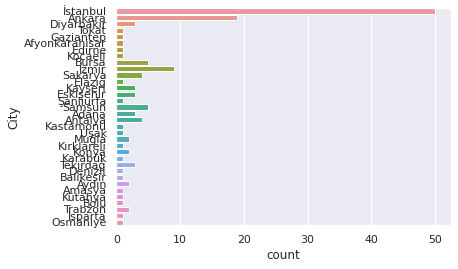

In [11]:
#sns.countplot(data = df_test, y = "City")
sns.countplot(data = df_train, y = "City")

Significantly more cities in the test data than the train dataset

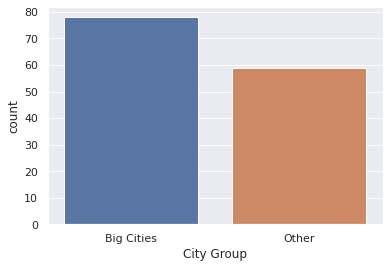

In [12]:
#sns.countplot(data = df_test, x = "City Group")
sns.countplot(data = df_train, x = "City Group")

Test data more 50/50 while the training data has a byse toward the 3 big cities

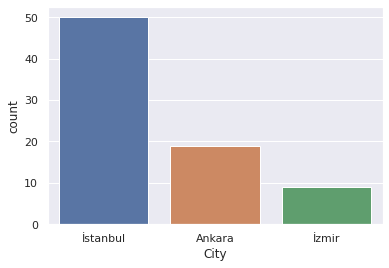

In [13]:
#sns.countplot(data = df_test[df_test["City Group"] == 'Big Cities'], x = "City")
sns.countplot(data = df_train[df_train["City Group"] == 'Big Cities'], x = "City")

In [14]:
#df_test["City"].value_counts() 
df_train["City"].value_counts() 

İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Kayseri            3
Eskişehir          3
Adana              3
Diyarbakır         3
Tekirdağ           3
Muğla              2
Trabzon            2
Aydın              2
Konya              2
Karabük            1
Isparta            1
Bolu               1
Kütahya            1
Amasya             1
Balıkesir          1
Denizli            1
Kocaeli            1
Kırklareli         1
Edirne             1
Uşak               1
Kastamonu          1
Tokat              1
Şanlıurfa          1
Elazığ             1
Gaziantep          1
Afyonkarahisar     1
Osmaniye           1
Name: City, dtype: int64

Only 3 Big Cities in both the training and test dataset but they make up 50% of the total number of restaurants. Istanbul around 1/3 of the total.

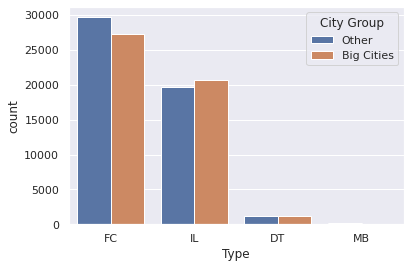

In [15]:
sns.countplot(data = df_test, x = "Type",  hue="City Group")
#sns.countplot(data = df_train, x = "Type",  hue="City Group")

The test data contain all 4 data types while the training data has no MB and byse toward FC and IL.

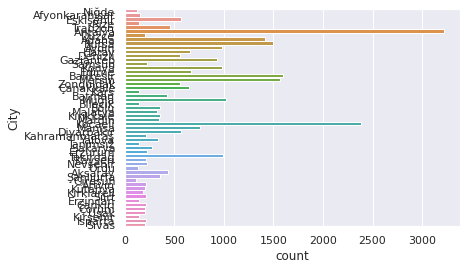

In [16]:
sns.countplot(data = df_test[(df_test["City Group"] == 'Other') & (df_test["Type"] == "FC")], y = "City")
#sns.countplot(data = df_train[(df_train["City Group"] == 'Other') & (df_train["Type"] == "FC")], y = "City")

Almost twice the number of other cities in the test set.

In [17]:
#df_test.isna().sum()
df_train.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
ODate         0
DOpen         0
dtype: int64

In [18]:
# Extracting names of numerical and categorical features
cols_num = list(df_train.drop(columns = ["revenue"]).select_dtypes(include = ["int64", "float64"]))
cols_cat = list(df_train.drop(columns = ["revenue"]).select_dtypes(include = ["object", "category", "bool"]))

print("Numerical columns:", cols_num)
print("Categorical columns:", cols_cat)

Numerical columns: ['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'DOpen']
Categorical columns: ['Open Date', 'City', 'City Group', 'Type']


In [19]:
print("Duplication in numerical columns in test data",df_test.duplicated(cols_num).sum())
print("Duplication in numerical columns in train data",df_train.duplicated(cols_num).sum())

Duplication in numerical columns in test data 0
Duplication in numerical columns in train data 0


In [20]:
print("Categorical matches in test data",df_test.duplicated(cols_cat).sum())
print("Categorical matches in train data",df_train.duplicated(cols_cat).sum())

Categorical matches in test data 80932
Categorical matches in train data 1


### Data distribution

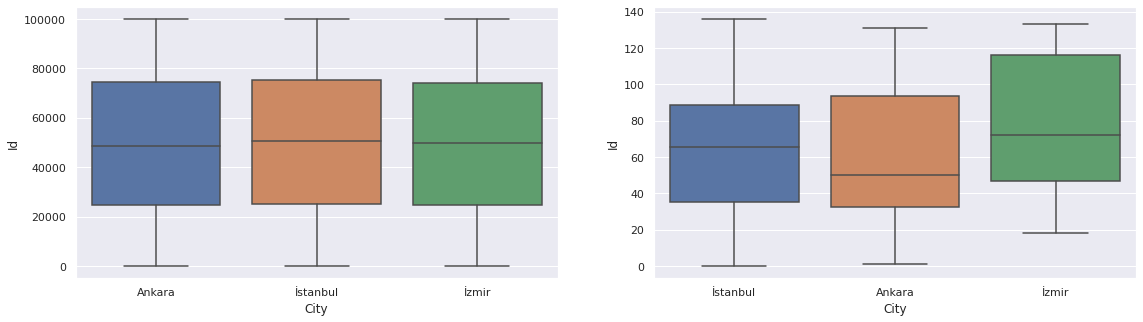

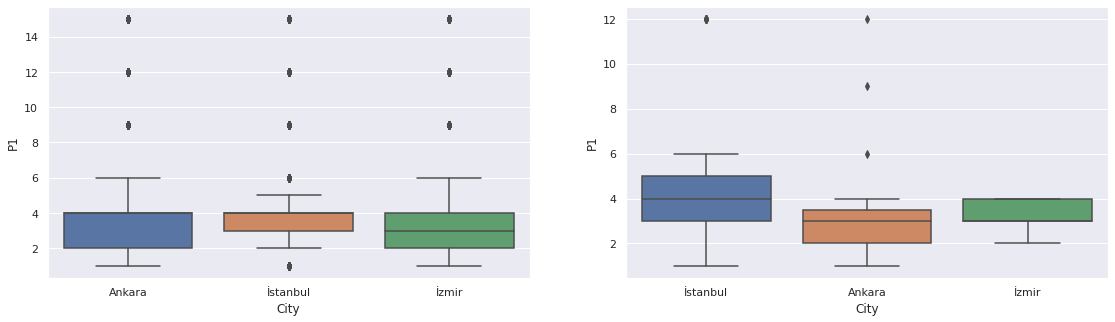

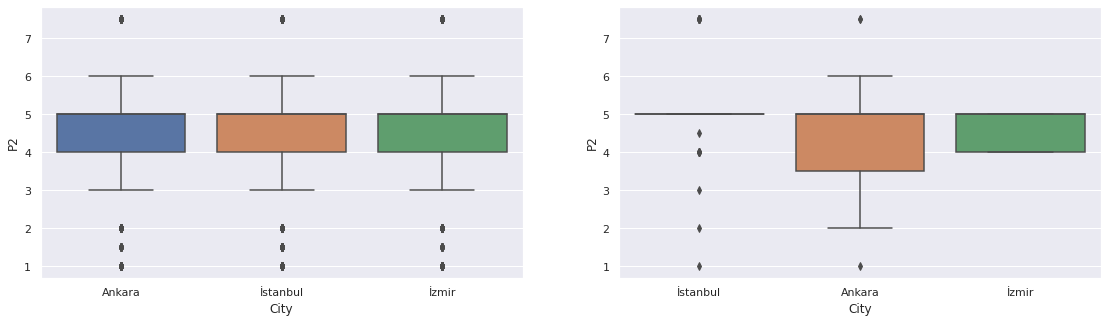

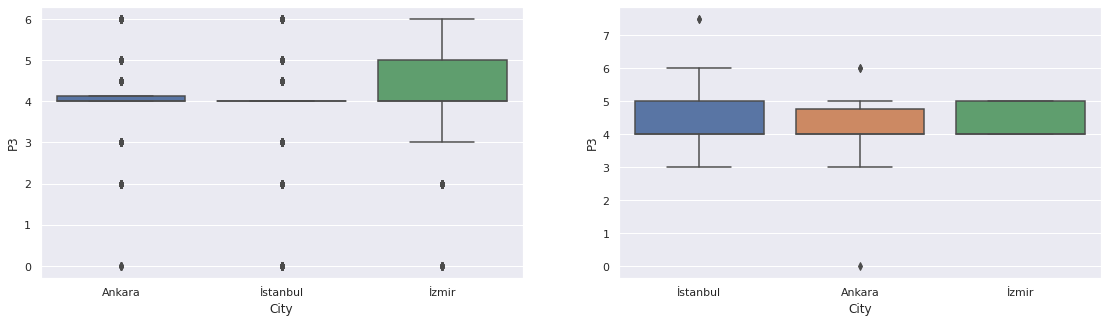

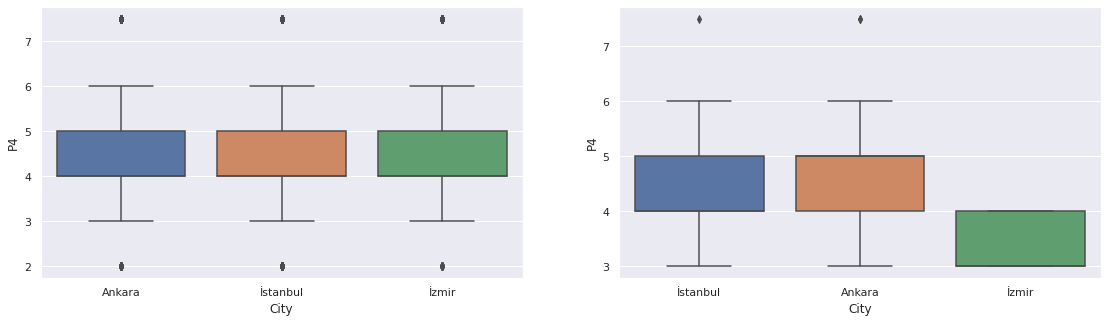

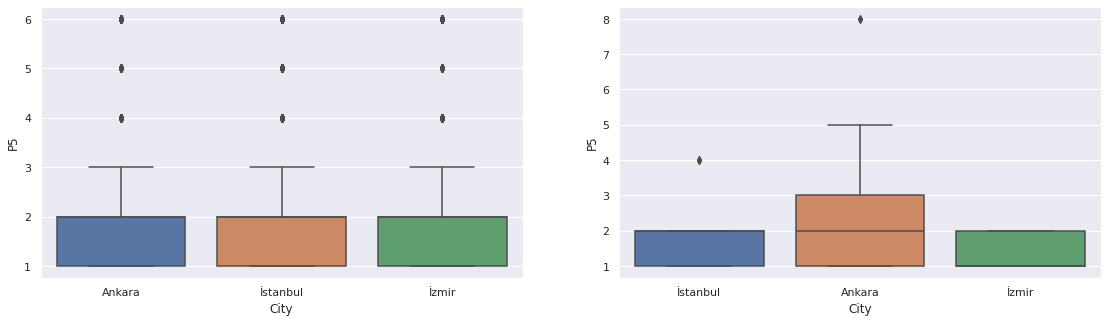

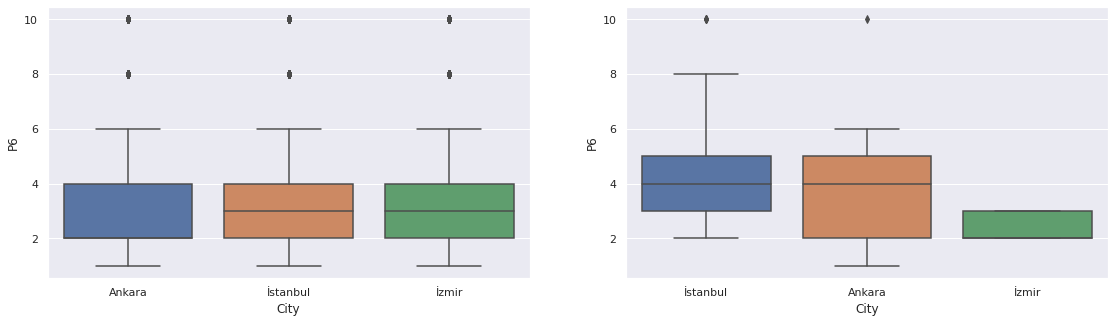

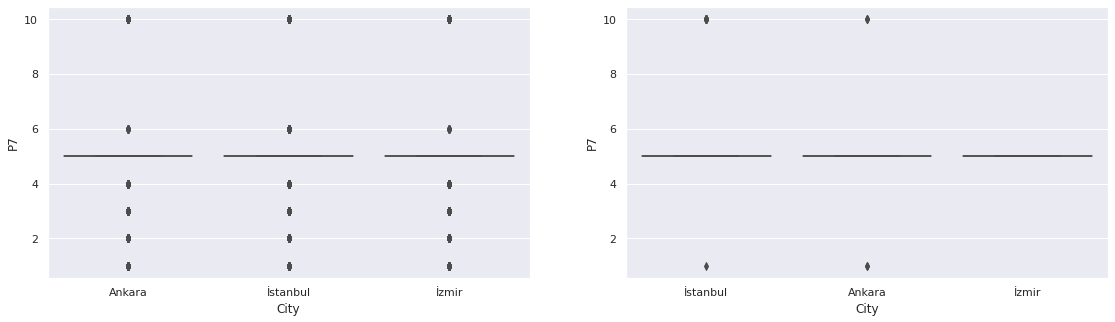

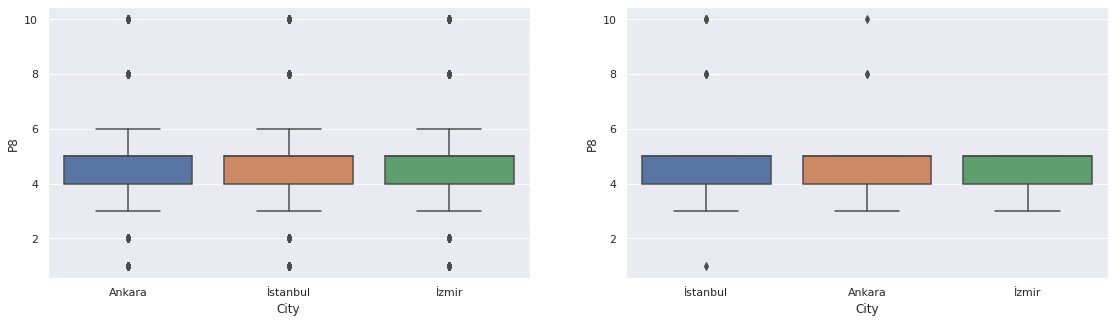

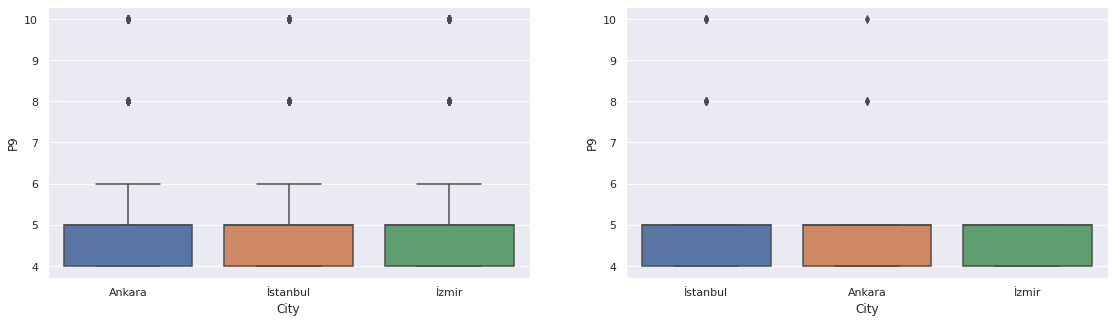

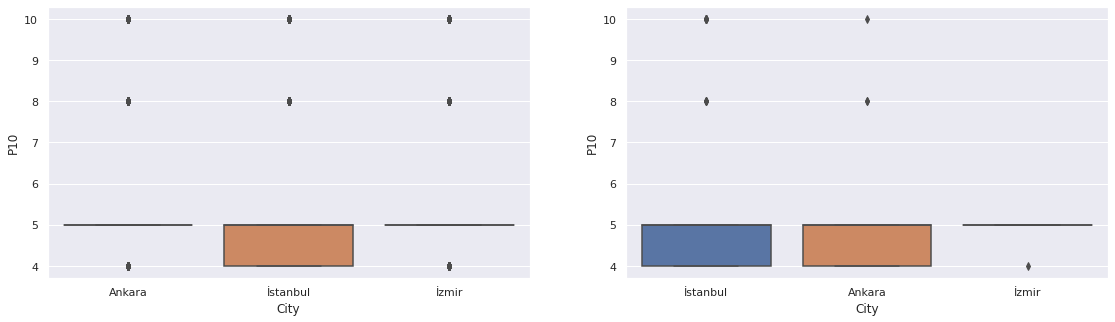

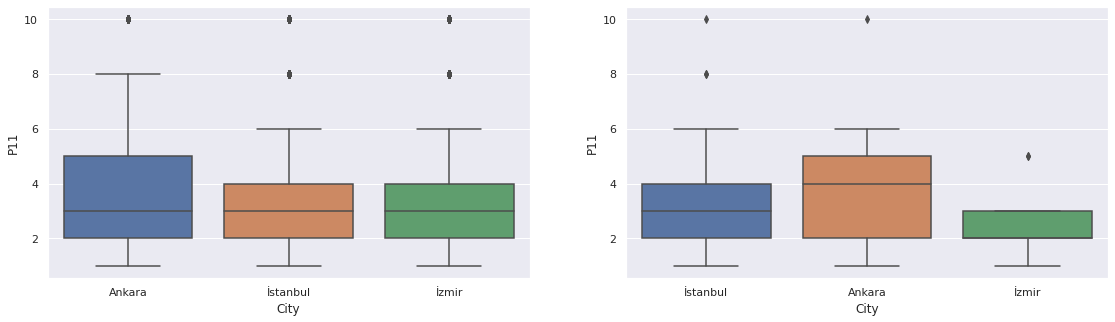

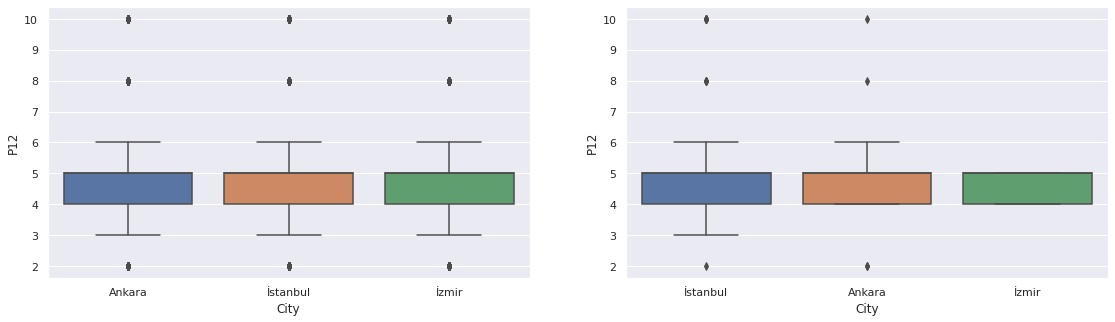

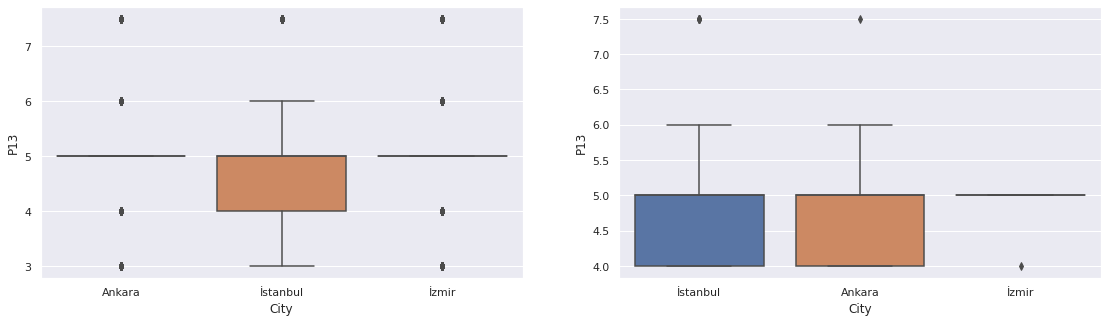

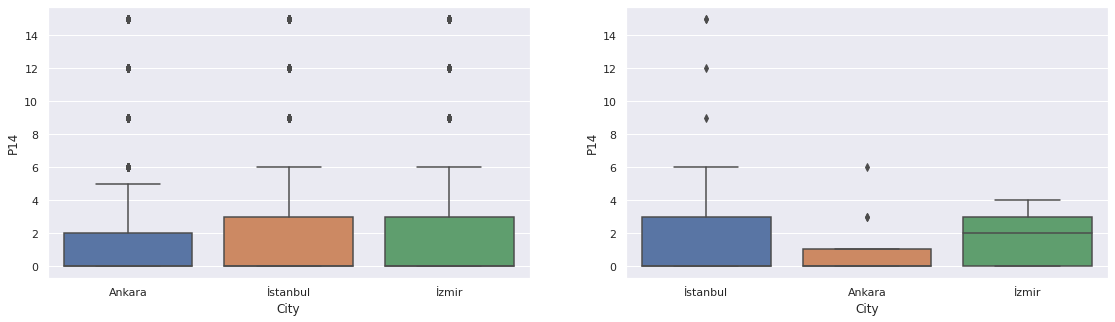

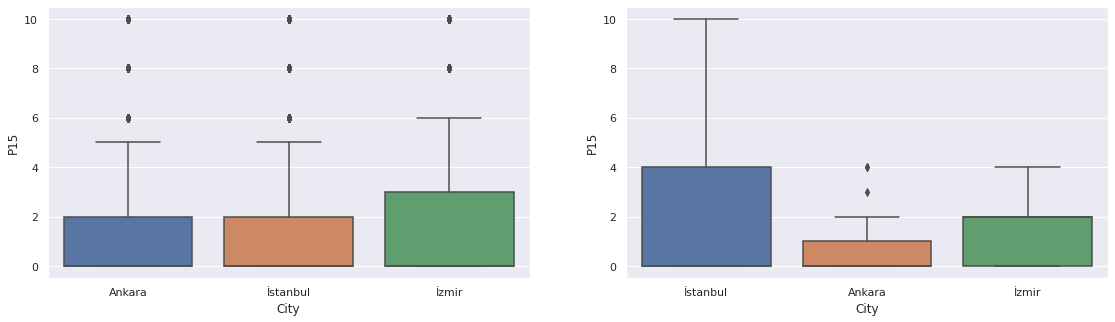

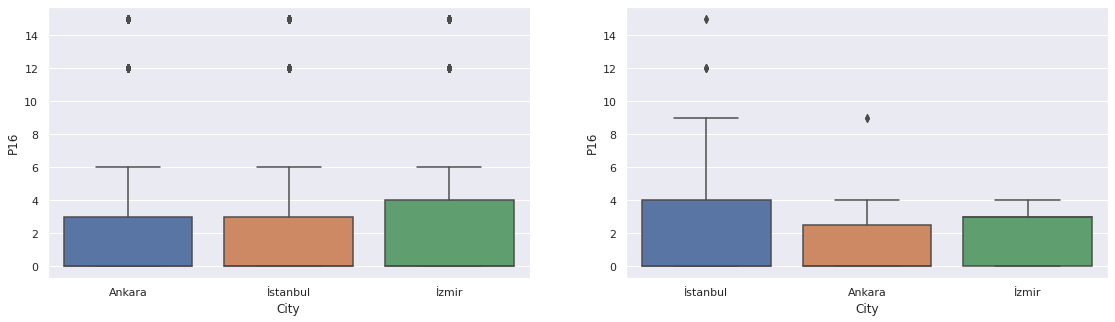

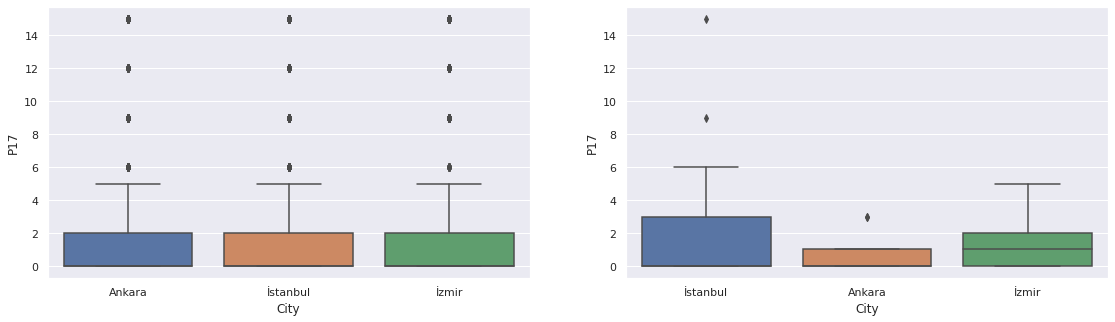

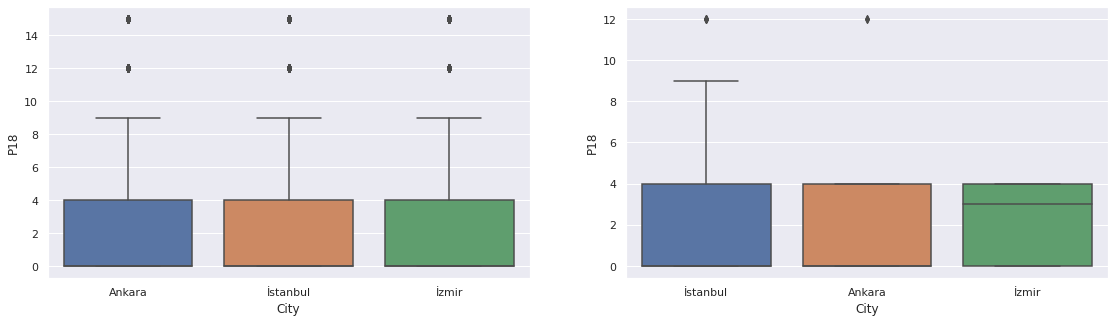

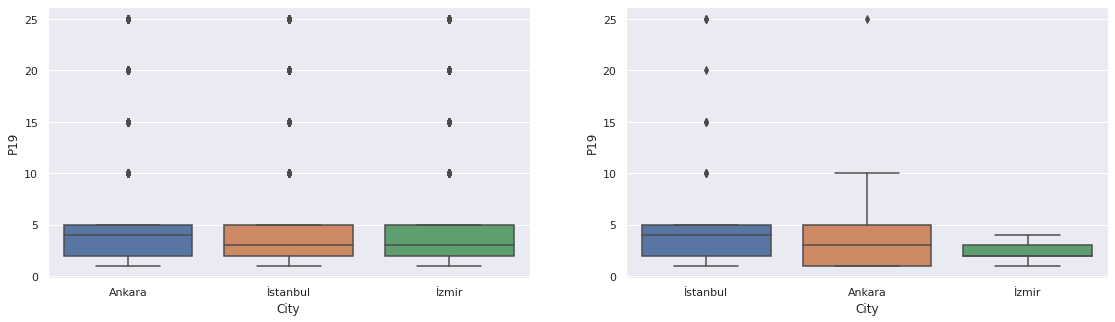

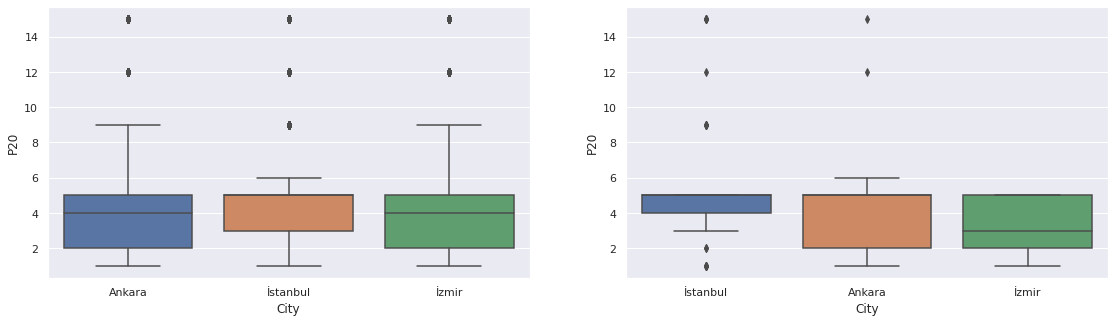

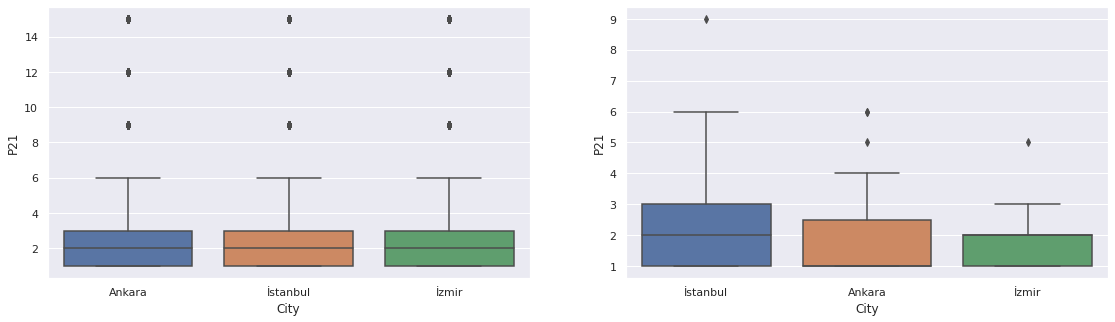

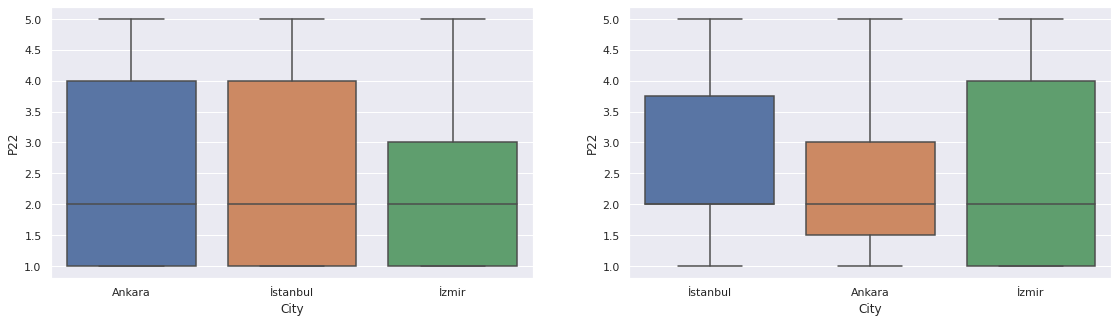

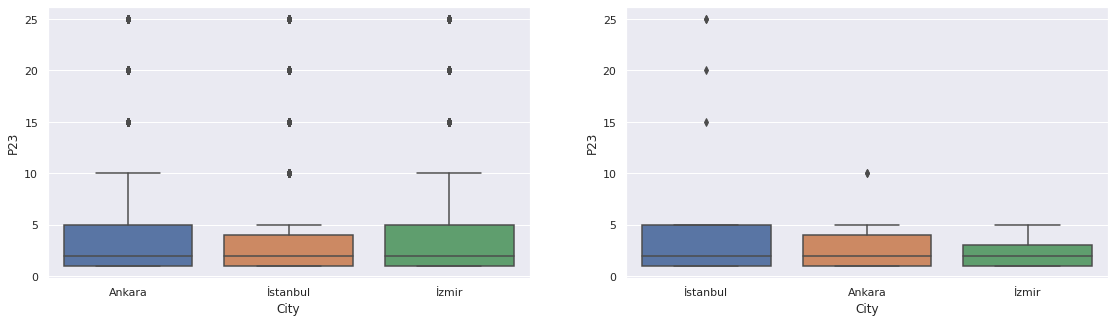

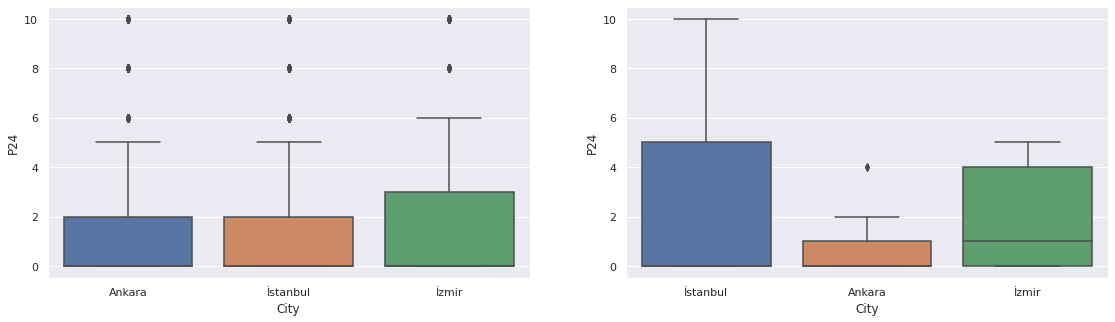

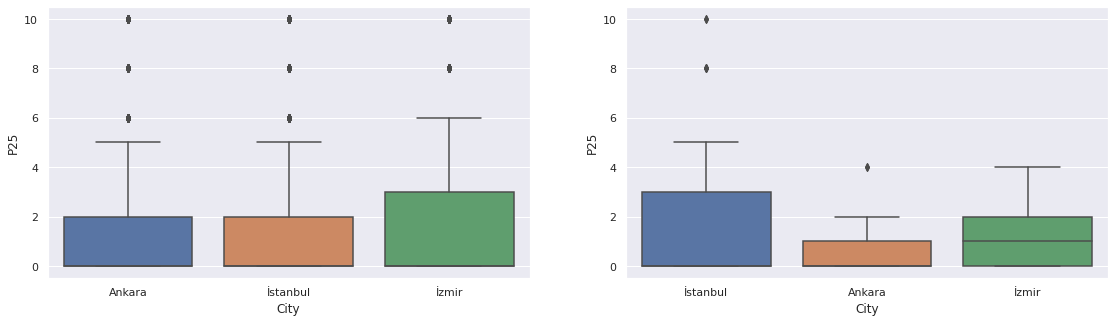

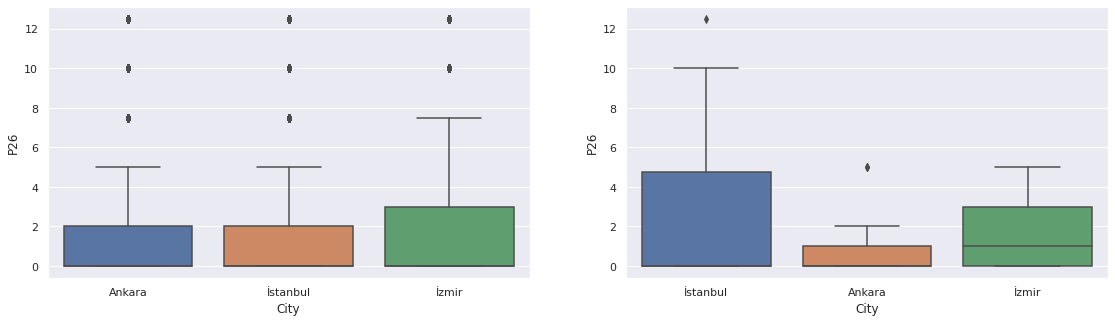

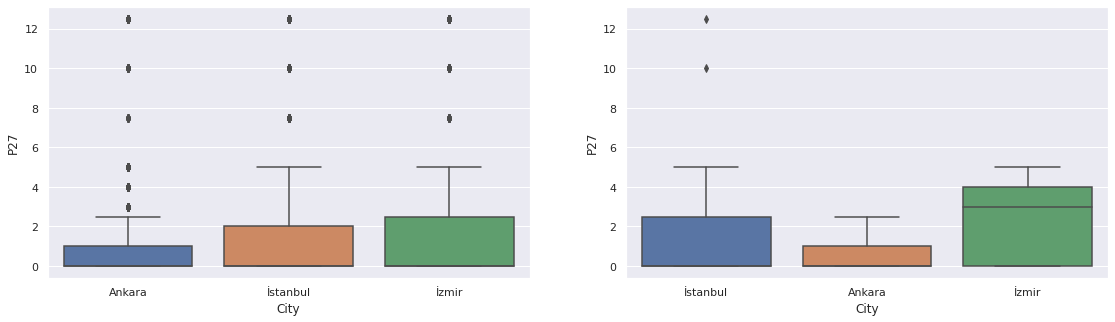

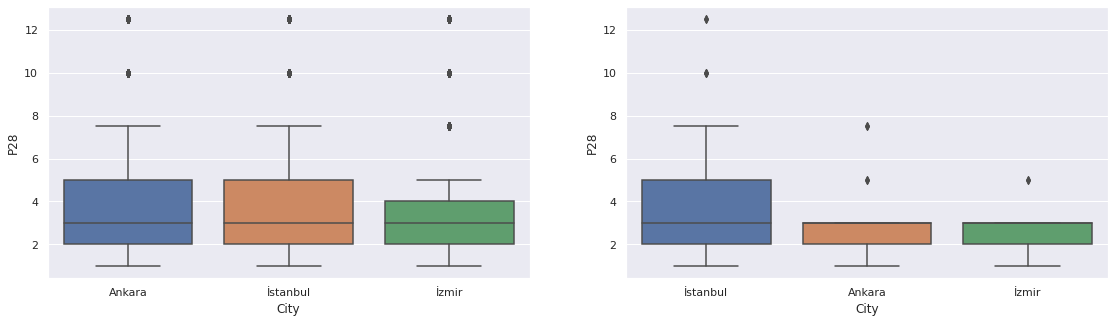

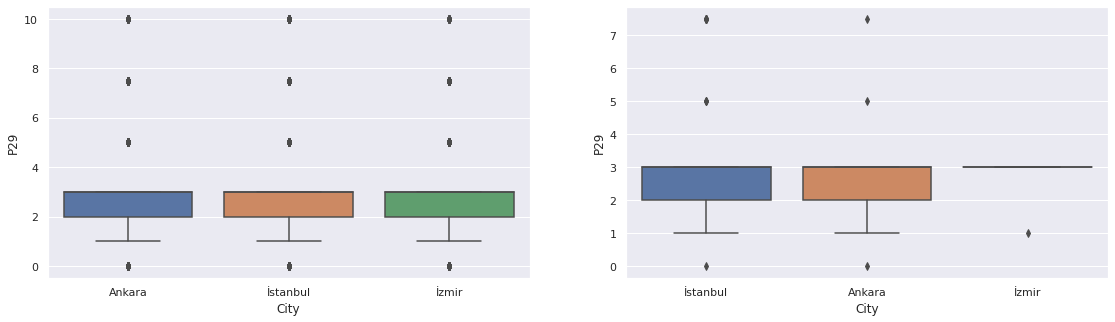

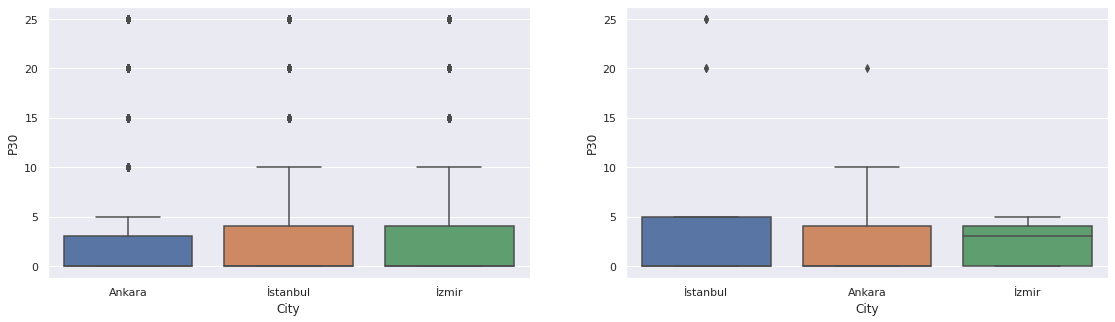

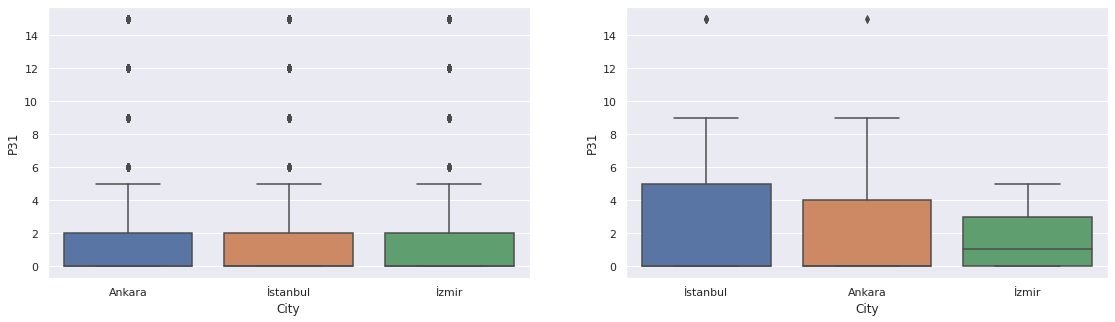

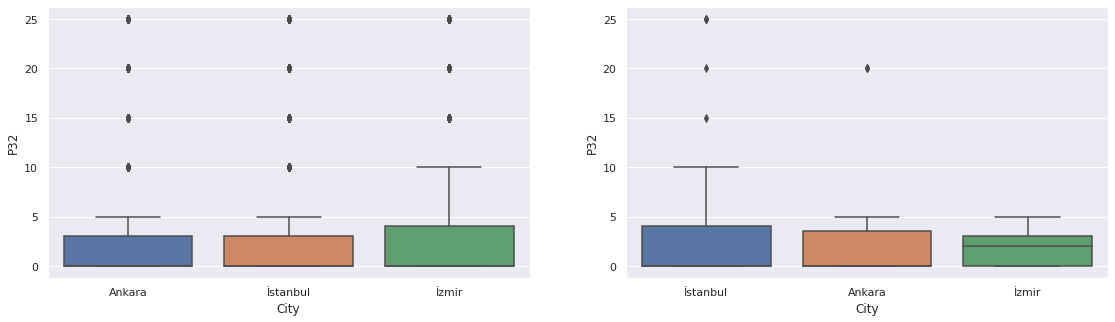

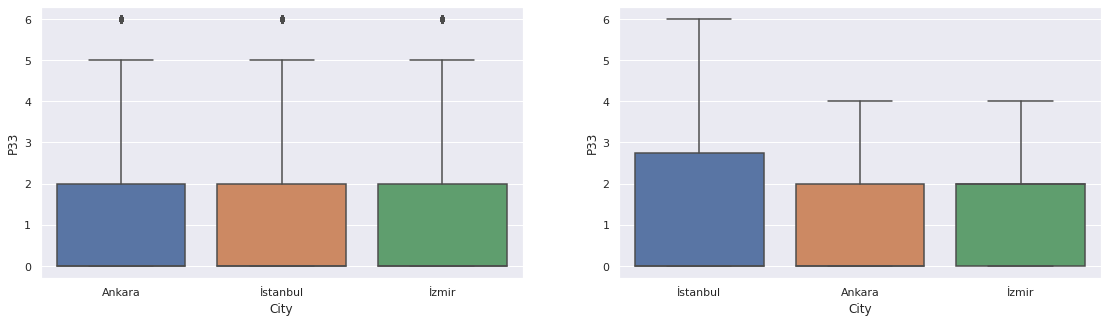

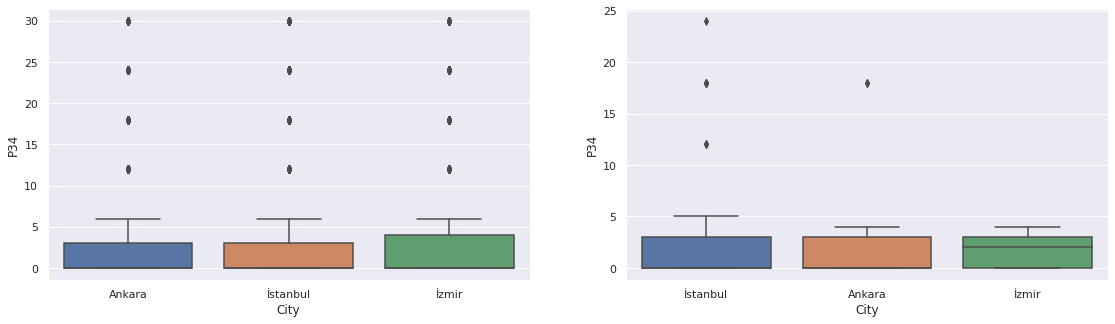

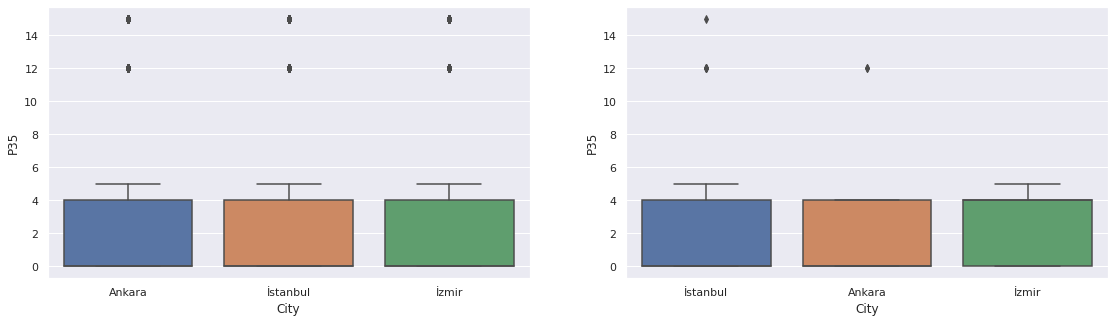

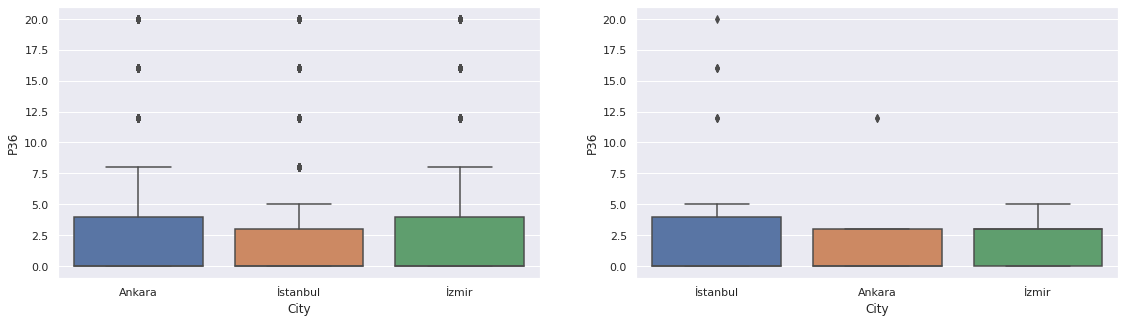

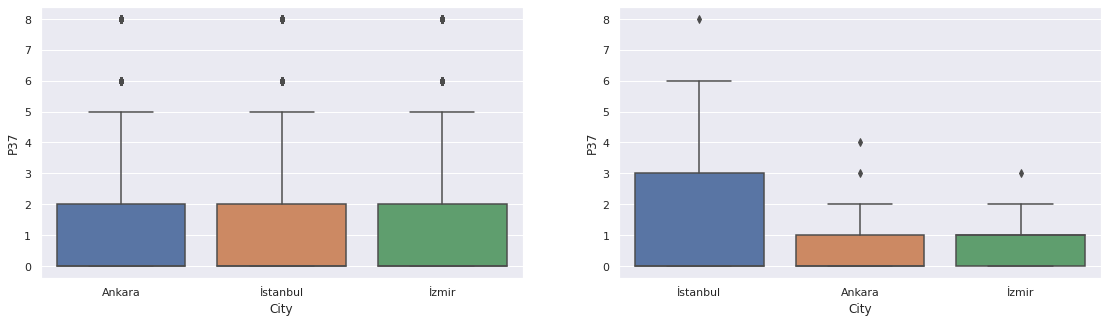

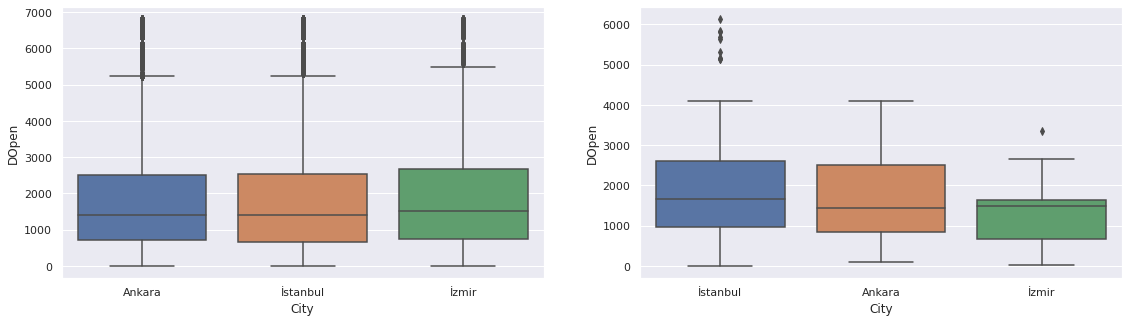

In [33]:
for i in cols_num:
  fig, ax = plt.subplots(1,2, figsize=(19, 5))
  g1 = sns.boxplot(data = df_test[df_test["City Group"] == 'Big Cities'], x = "City", y = i, showfliers = True, ax=ax[0])
  g2 = sns.boxplot(data = df_train[df_train["City Group"] == 'Big Cities'], x = "City", y = i, showfliers = True, ax=ax[1])
  fig.show()

In [22]:
cities = df_test['City'].unique()
cities

array(['Niğde', 'Konya', 'Ankara', 'Kocaeli', 'Afyonkarahisar',
       'Eskişehir', 'Rize', 'İstanbul', 'Trabzon', 'Antalya', 'Muğla',
       'Düzce', 'Adana', 'Bursa', 'Aydın', 'Hatay', 'Denizli', 'İzmir',
       'Gaziantep', 'Samsun', 'Erzurum', 'Edirne', 'Balıkesir', 'Mersin',
       'Zonguldak', 'Malatya', 'Çanakkale', 'Kars', 'Bolu', 'Batman',
       'Bilecik', 'Giresun', 'Tekirdağ', 'Sivas', 'Kırıkkale', 'Mardin',
       'Erzincan', 'Manisa', 'Diyarbakır', 'Kahramanmaraş', 'Yalova',
       'Tanımsız', 'Sakarya', 'Kırşehir', 'Aksaray', 'Kayseri',
       'Nevşehir', 'Çorum', 'Ordu', 'Kırklareli', 'Şanlıurfa', 'Artvin',
       'Uşak', 'Kütahya', 'Siirt', 'Çankırı', 'Isparta'], dtype=object)

In [43]:
print("Unique cities in training set", df_train['City'].nunique(), "in the test set", df_test['City'].nunique())

Unique cities in training set 34 in the test set 57


In [23]:
df_test[df_test["City"] == 'İstanbul'].describe().transpose()
#df_test.describe().transpose()
#df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,34087.0,50220.765365,28870.801140,8.0,25205.0,50469.0,75229.5,99999.0
P1,34087.0,4.291255,2.844997,1.0,3.0,4.0,4.0,15.0
P2,34087.0,4.608824,1.372520,1.0,4.0,5.0,5.0,7.5
P3,34087.0,4.225144,0.797739,0.0,4.0,4.0,4.0,6.0
P4,34087.0,4.431998,1.022625,2.0,4.0,4.0,5.0,7.5
P5,34087.0,1.946167,1.031429,1.0,1.0,2.0,2.0,6.0
P6,34087.0,3.075425,1.612283,1.0,2.0,3.0,4.0,10.0
P7,34087.0,5.384985,2.079035,1.0,5.0,5.0,5.0,10.0
P8,34087.0,4.914542,1.677569,1.0,4.0,5.0,5.0,10.0
P9,34087.0,5.201778,1.683732,4.0,4.0,5.0,5.0,10.0


In [ ]:

g1 = sns.countplot(df['City Group'],palette="Set2", ax=ax[0]);
g2 = sns.countplot(test_df['City Group'],palette="Set2", ax=ax[1]);


### Basic correlation analysis:

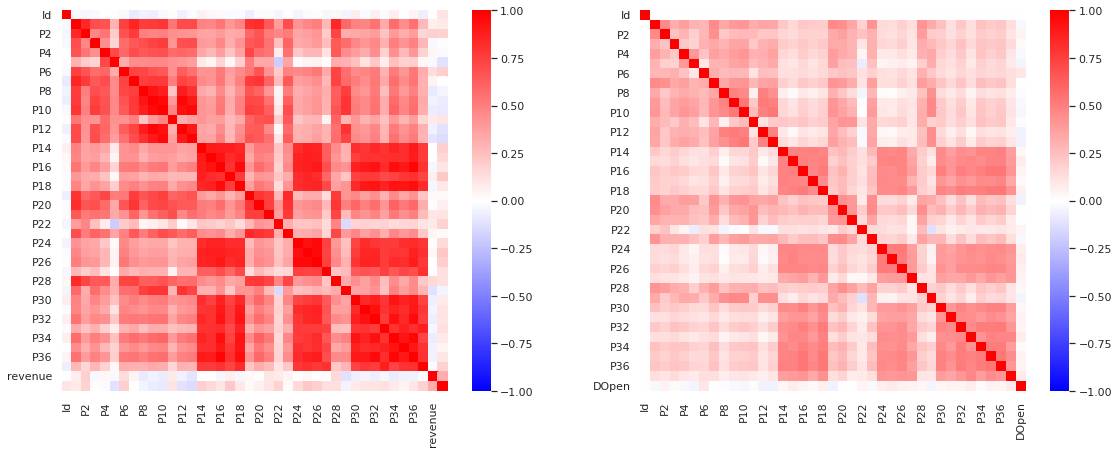

In [36]:
fig, ax = plt.subplots(1,2, figsize=(19, 7))
g1 = sns.heatmap(data = df_train.corr(), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax = ax[0]);
g2 = sns.heatmap(data = df_test.corr(), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax = ax[1]);
fig.show()

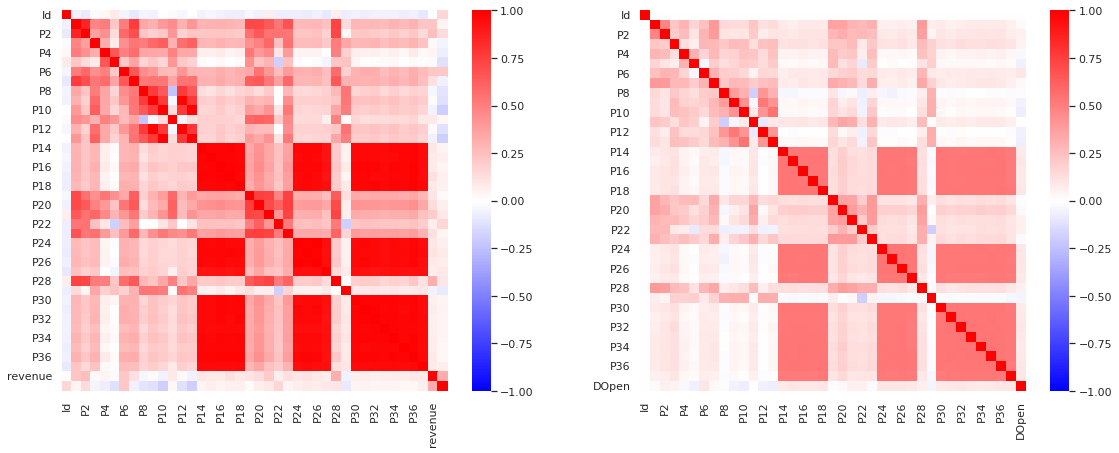

In [37]:
fig, ax = plt.subplots(1,2, figsize=(19, 7))
g1 = sns.heatmap(data = df_train.corr(method = "spearman"), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax=ax[0]);
g2 = sns.heatmap(data = df_test.corr(method = "spearman"), vmin = -1, vmax = 1, annot = False, cmap ='bwr', ax=ax[1]);
fig.show()

### Histrogram plots

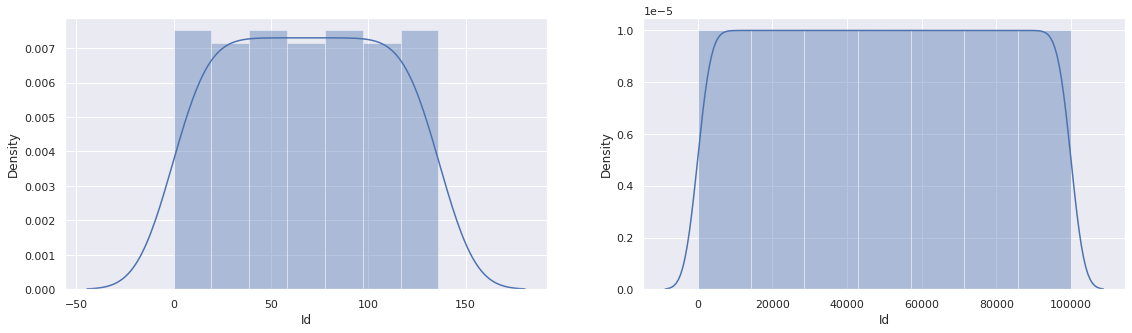

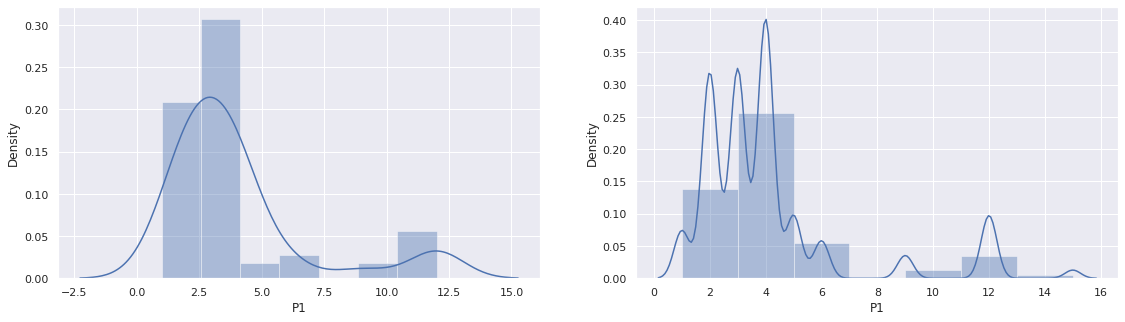

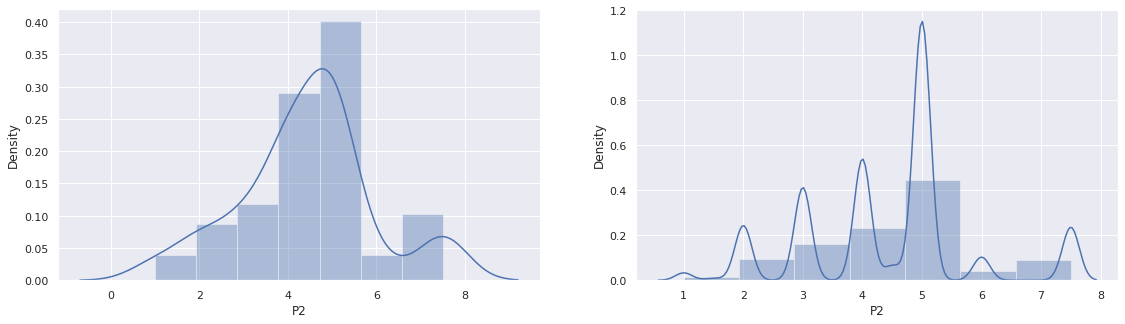

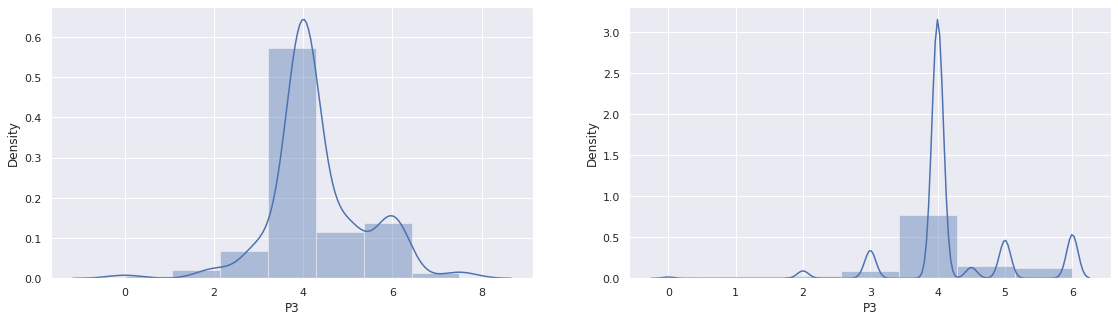

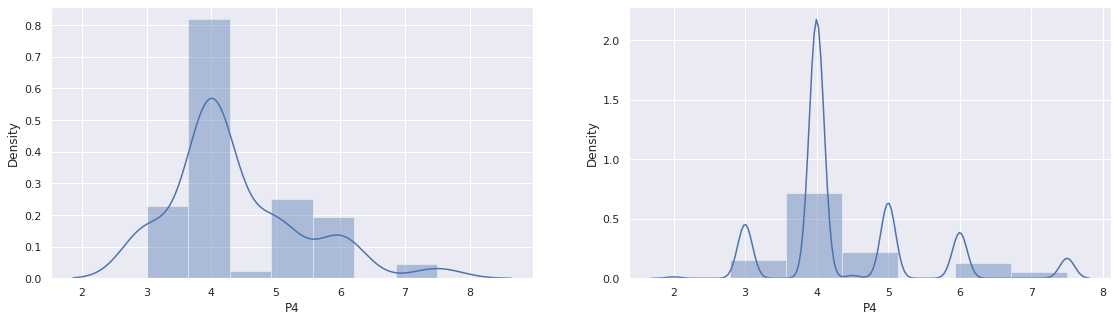

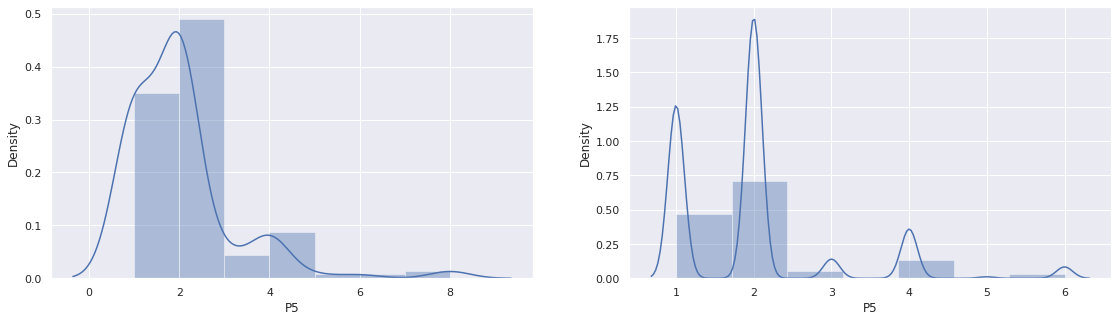

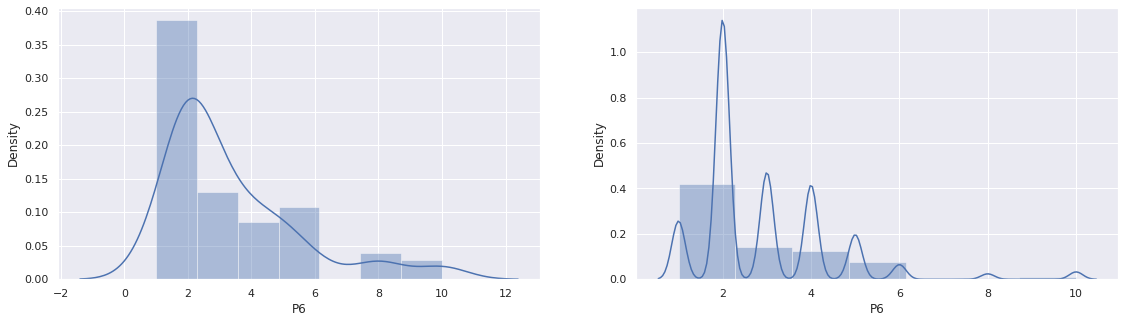

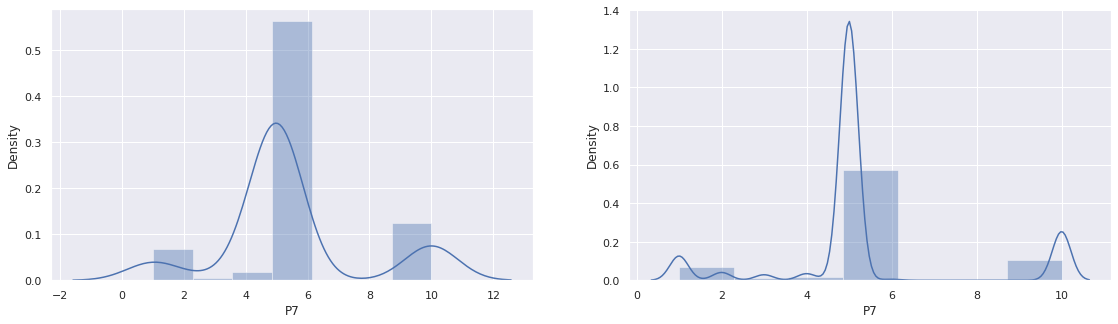

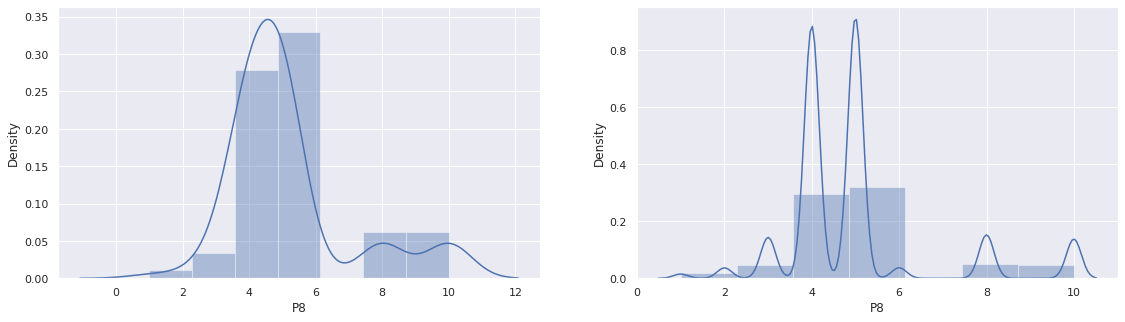

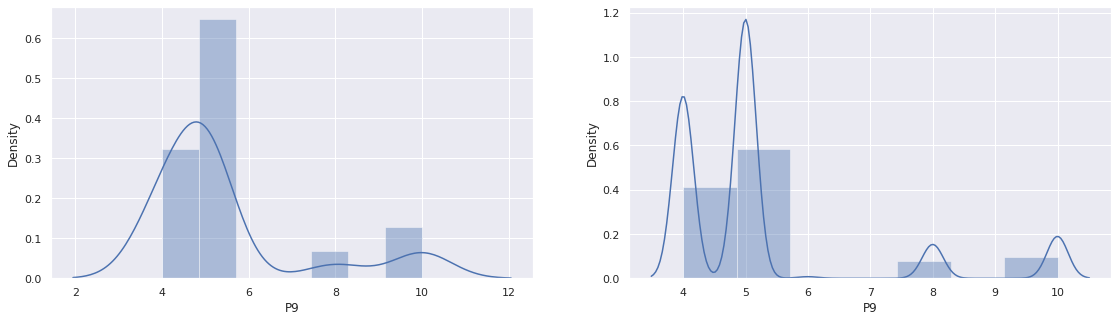

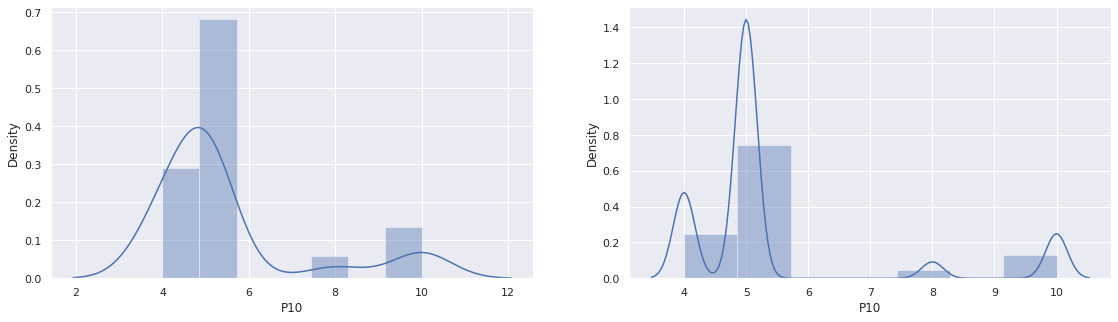

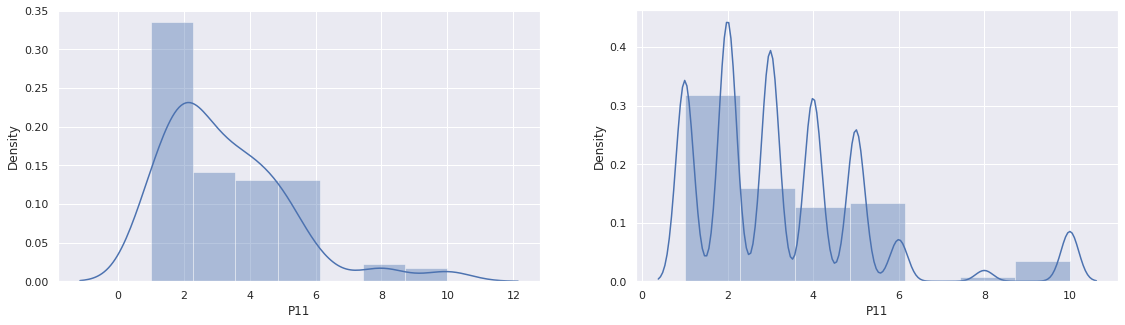

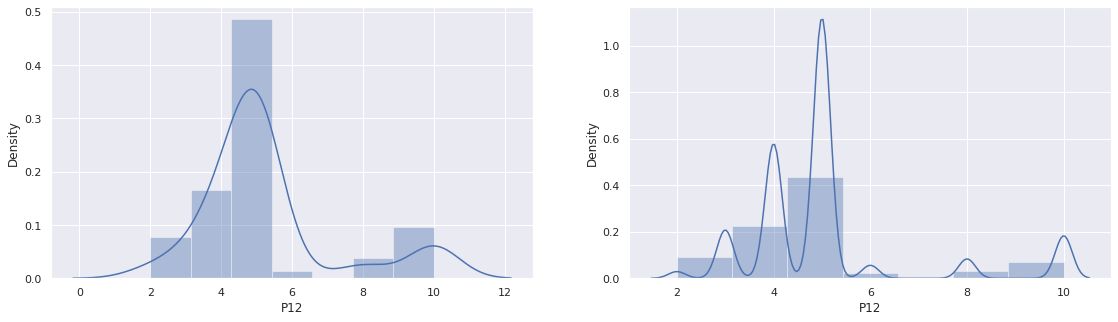

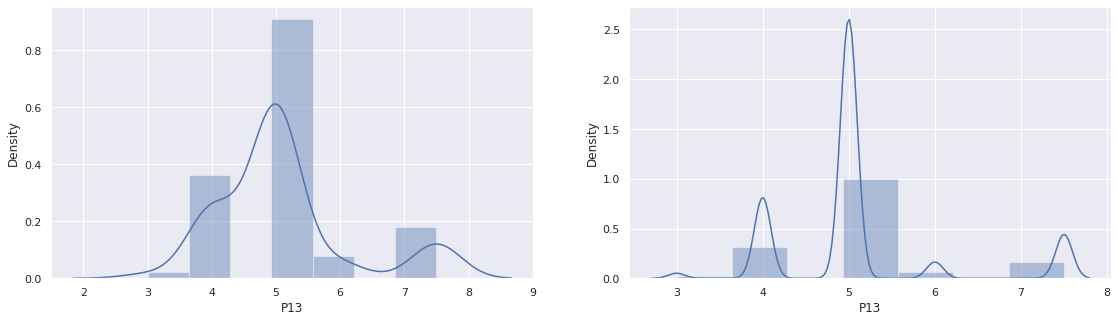

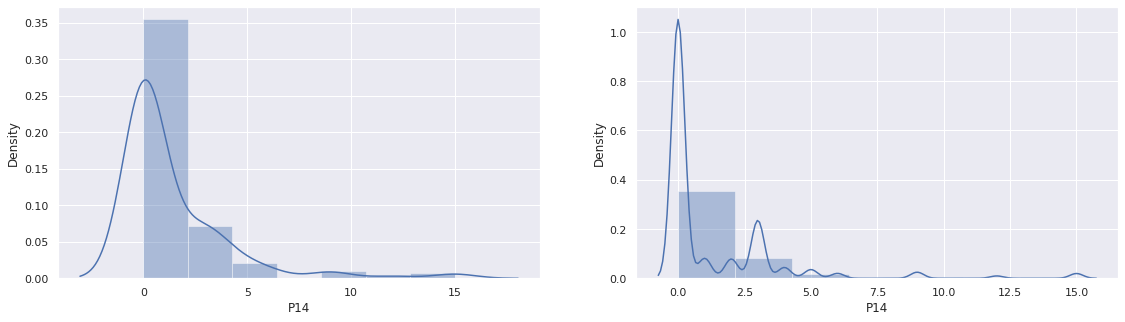

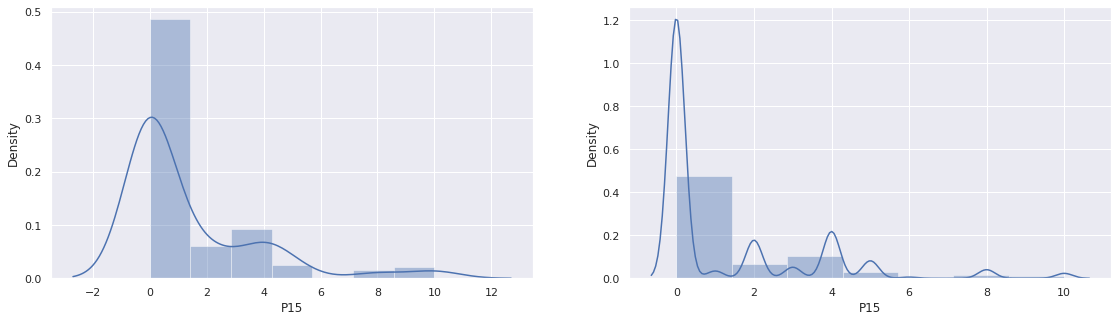

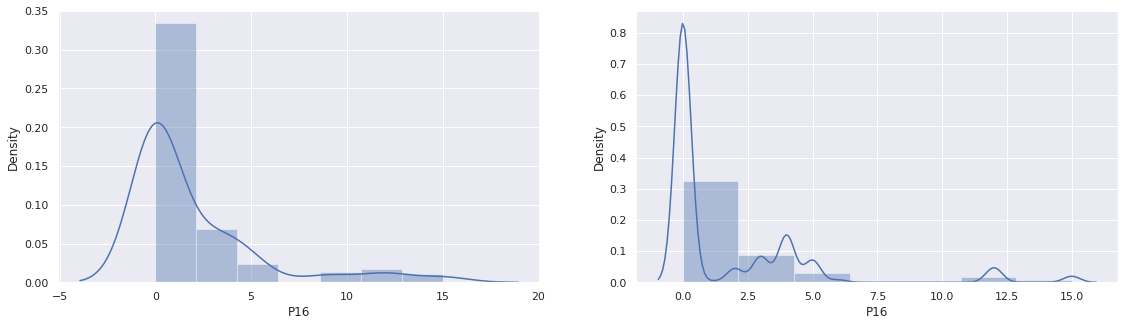

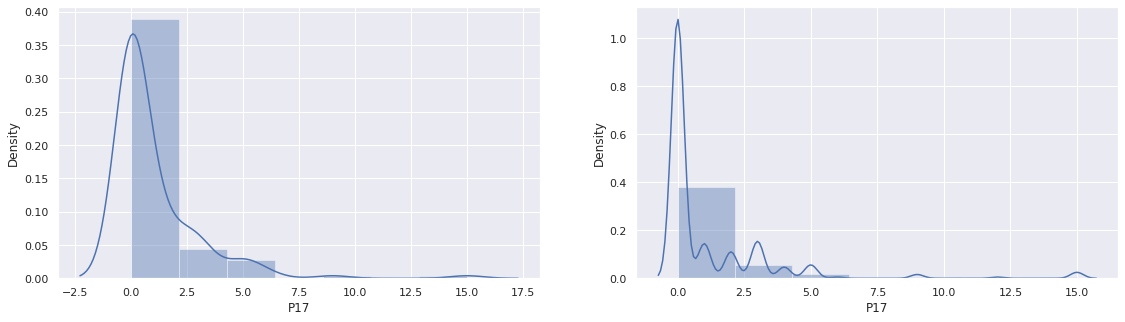

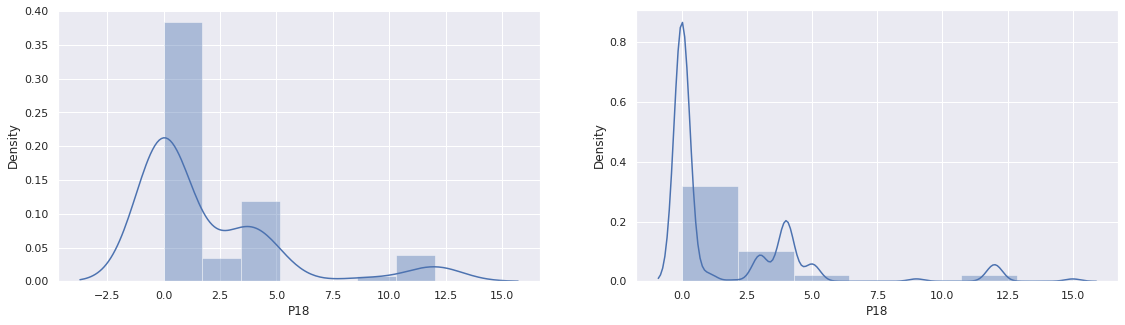

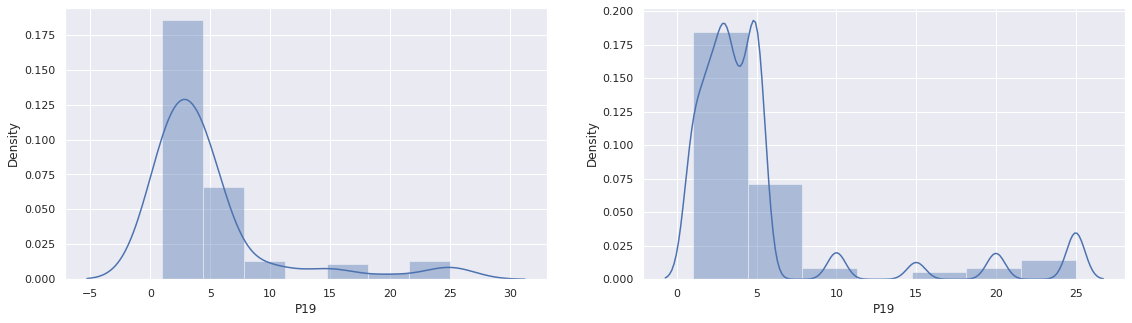

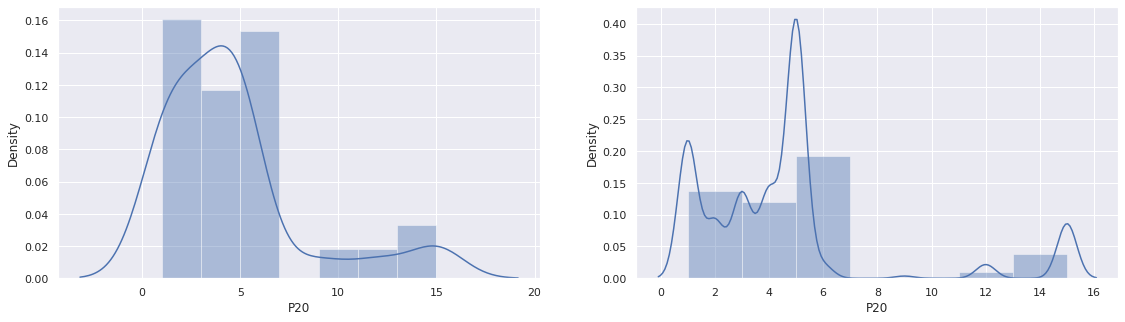

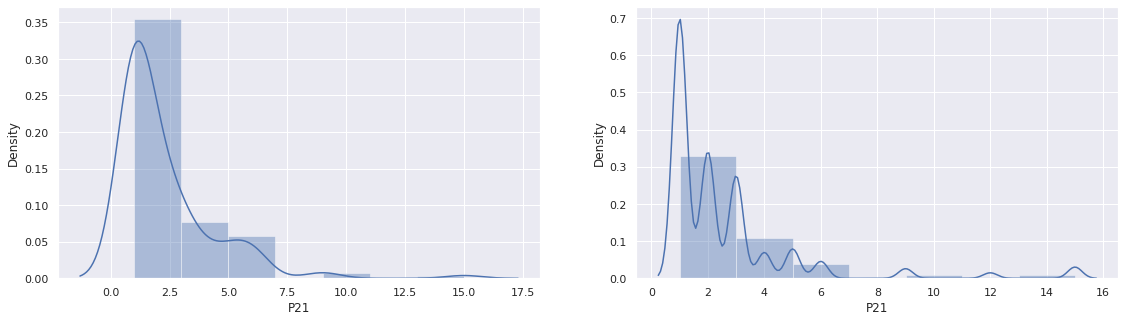

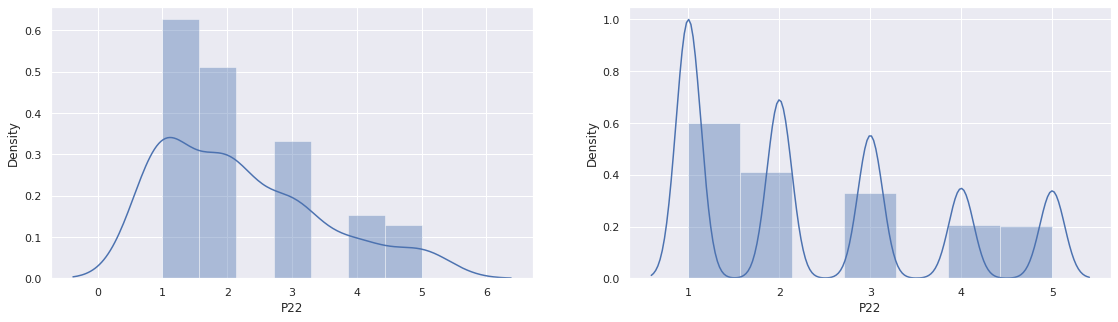

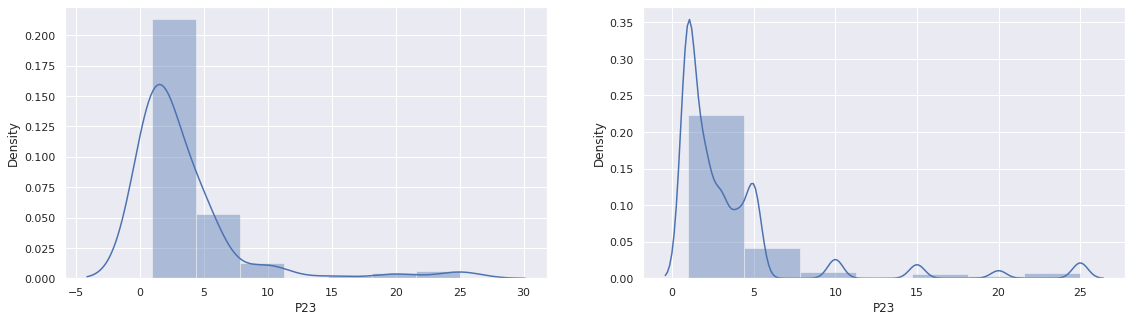

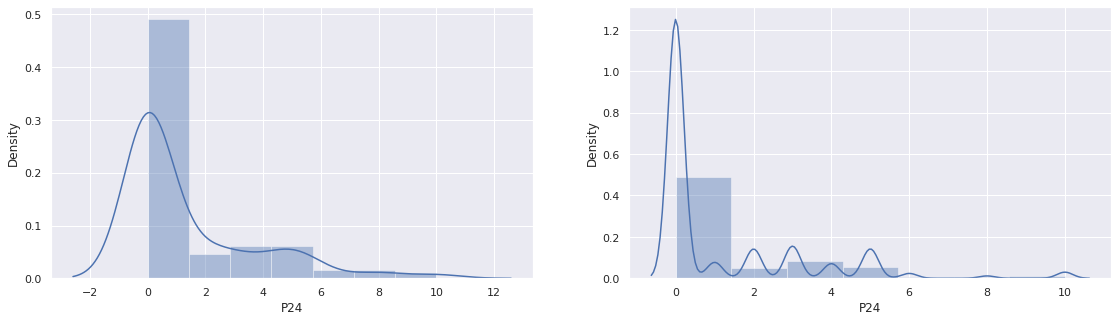

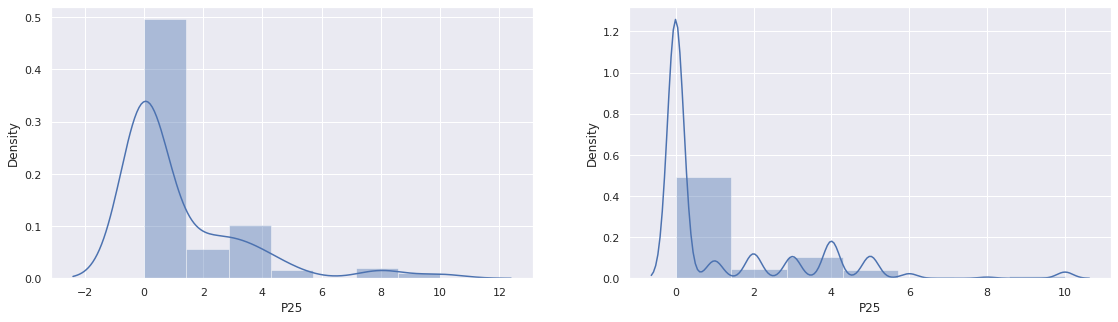

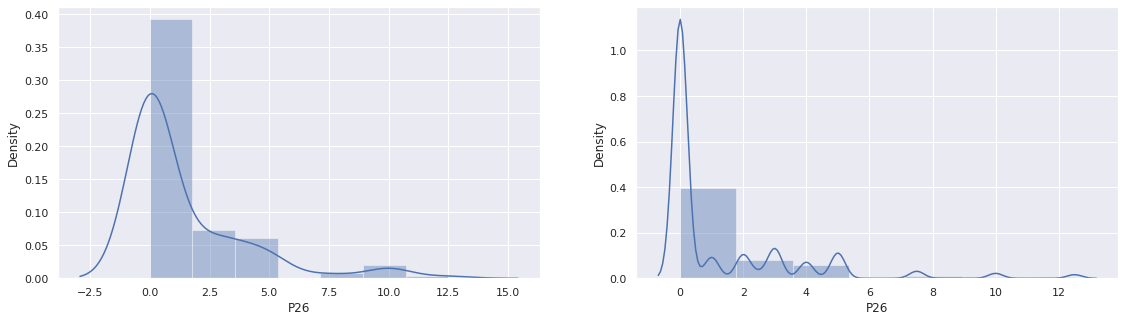

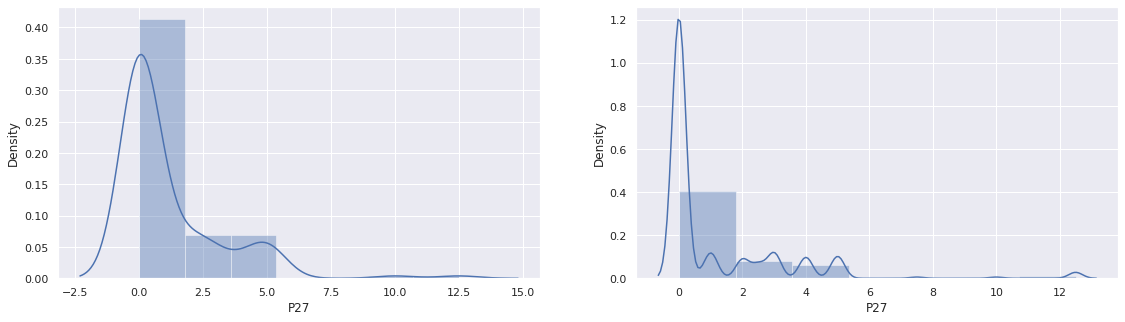

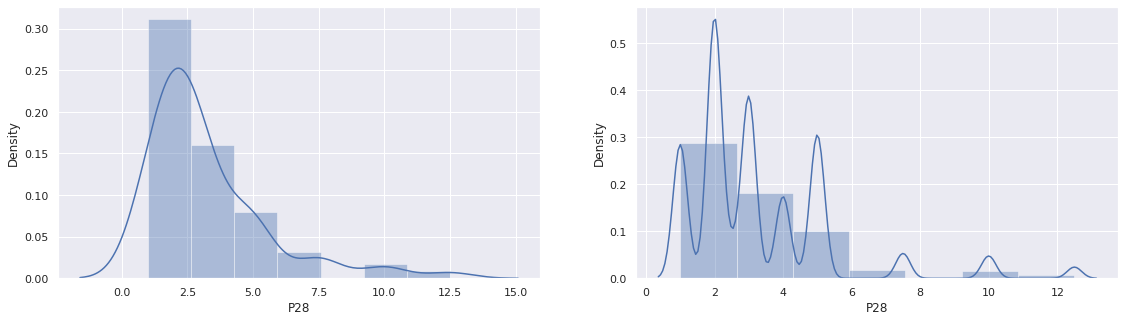

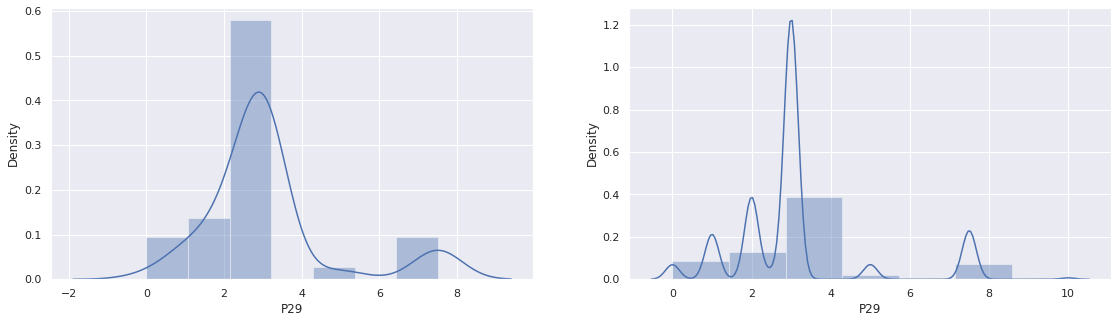

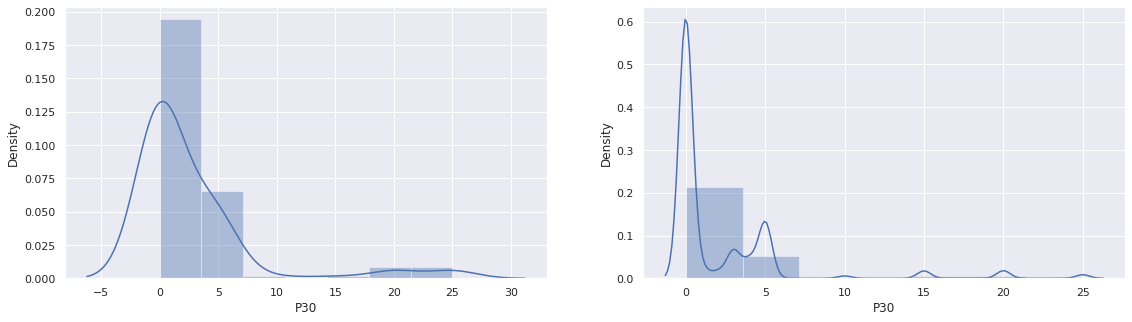

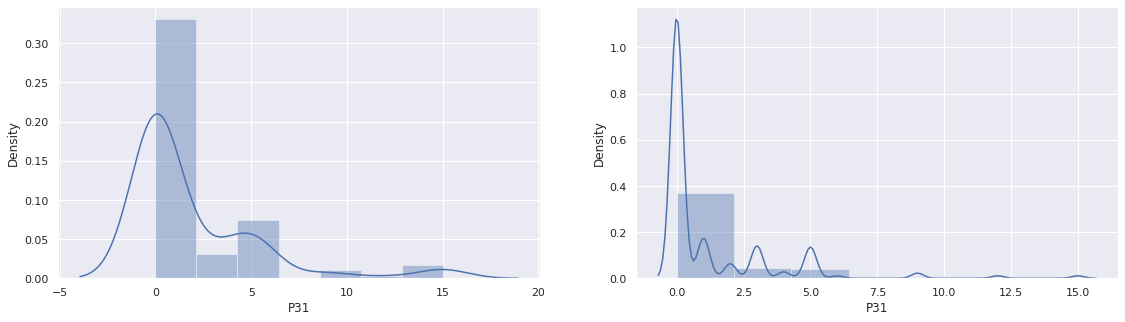

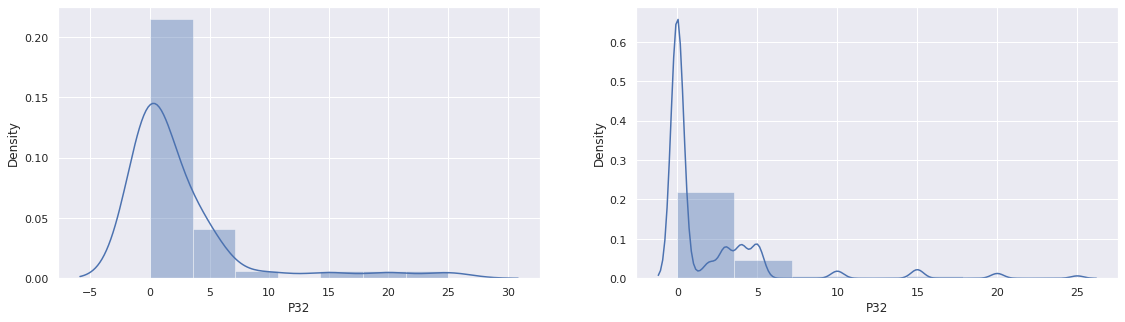

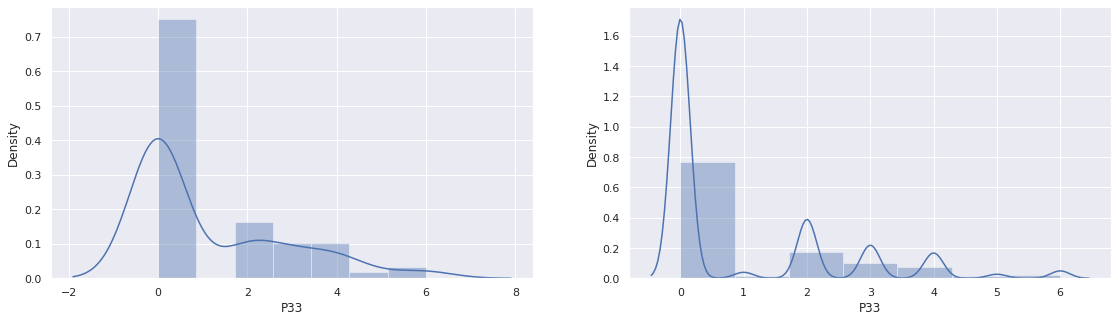

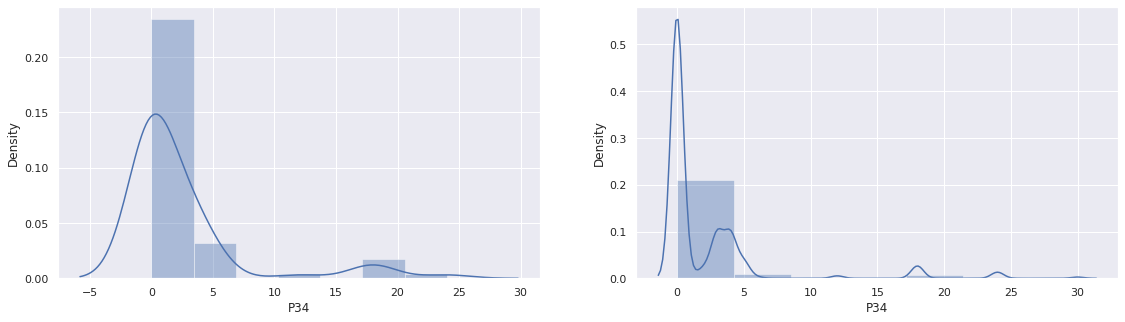

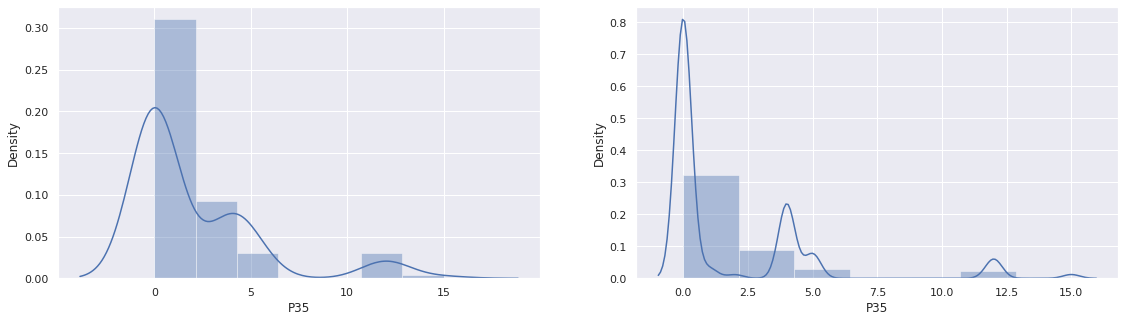

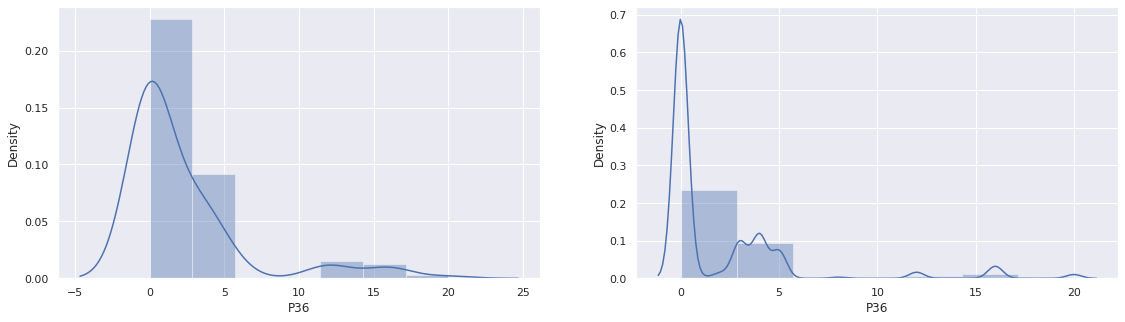

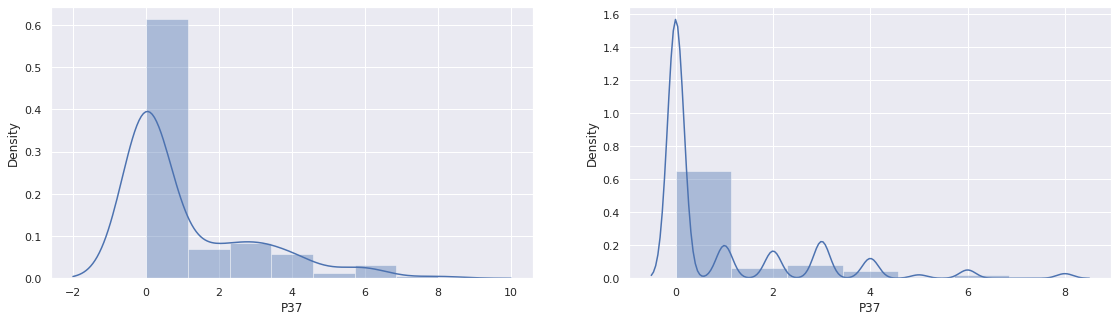

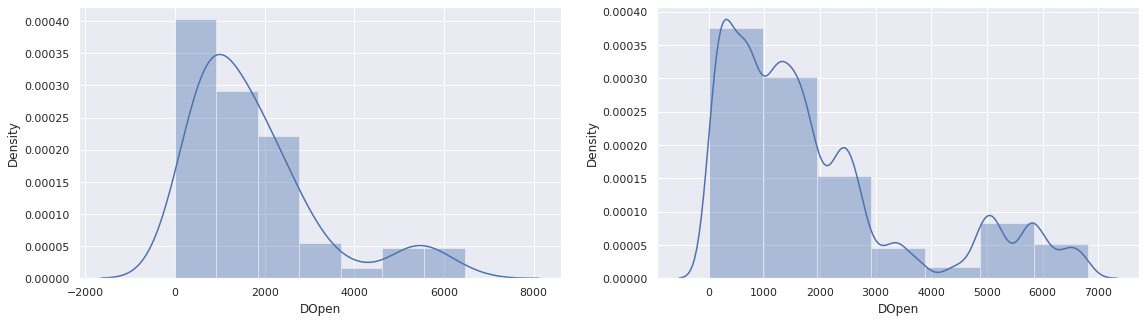

In [47]:
plt.rc('figure', max_open_warning = 0)
for i in cols_num:
    fig, ax = plt.subplots(1,2, figsize=(19, 5))
    g1 = sns.distplot(df_train[i], ax=ax[0], bins = 7)#, kde=False);
    g2 = sns.distplot(df_test[i], ax=ax[1], bins = 7)#, kde=False);
    fig.show()

In [29]:
def hist_box(data, feature, figsize=(12, 7), drop = -99999):

    # Subplot canvas
    fig, (ax_box, ax_hist) = plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios": (0.25, 0.75)}, figsize = figsize)

    # Boxplot on top
    sns.boxplot(data = data[data[feature] != drop], x = feature, ax = ax_box, showmeans = True, color = "pink")  # boxplot will be created and a star will indicate the mean value of the column
    
    # Histogram on bottom
    sns.histplot(data = data[data[feature] != drop], x = feature, ax = ax_hist, kde = True) # histogram will be created and

    # Add mean and median to histogram
    ax_hist.axvline(data[feature][data[feature] != drop].mean(), color = "green") # mean
    ax_hist.axvline(data[feature][data[feature] != drop].median(), color = "orange") # median

    # Title
    fig.suptitle("Distribution of " + feature, fontsize=16)

In [38]:
#cities

array(['Niğde', 'Konya', 'Ankara', 'Kocaeli', 'Afyonkarahisar',
       'Eskişehir', 'Rize', 'İstanbul', 'Trabzon', 'Antalya', 'Muğla',
       'Düzce', 'Adana', 'Bursa', 'Aydın', 'Hatay', 'Denizli', 'İzmir',
       'Gaziantep', 'Samsun', 'Erzurum', 'Edirne', 'Balıkesir', 'Mersin',
       'Zonguldak', 'Malatya', 'Çanakkale', 'Kars', 'Bolu', 'Batman',
       'Bilecik', 'Giresun', 'Tekirdağ', 'Sivas', 'Kırıkkale', 'Mardin',
       'Erzincan', 'Manisa', 'Diyarbakır', 'Kahramanmaraş', 'Yalova',
       'Tanımsız', 'Sakarya', 'Kırşehir', 'Aksaray', 'Kayseri',
       'Nevşehir', 'Çorum', 'Ordu', 'Kırklareli', 'Şanlıurfa', 'Artvin',
       'Uşak', 'Kütahya', 'Siirt', 'Çankırı', 'Isparta'], dtype=object)

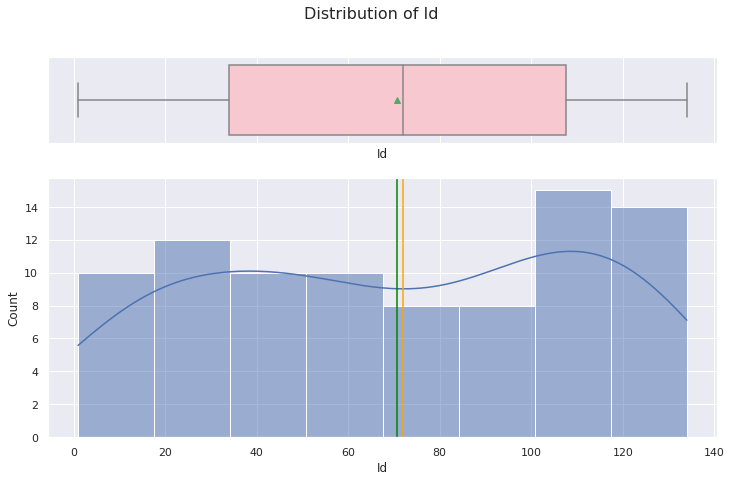

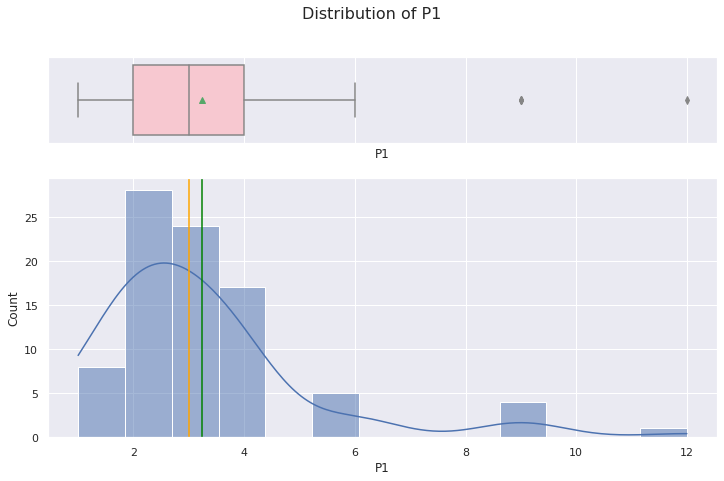

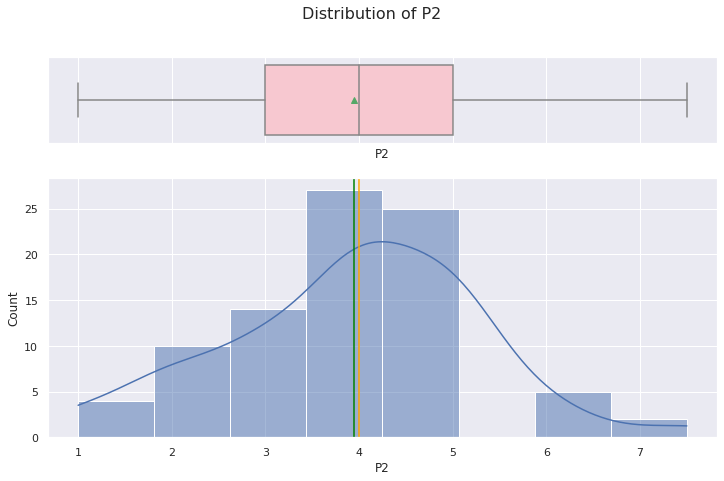

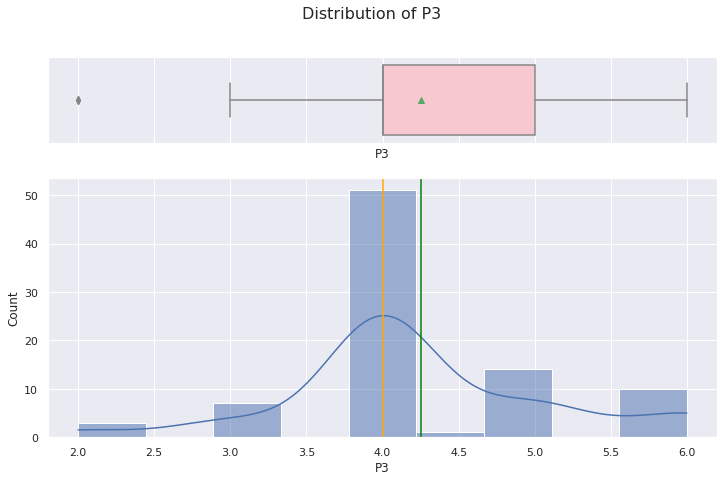

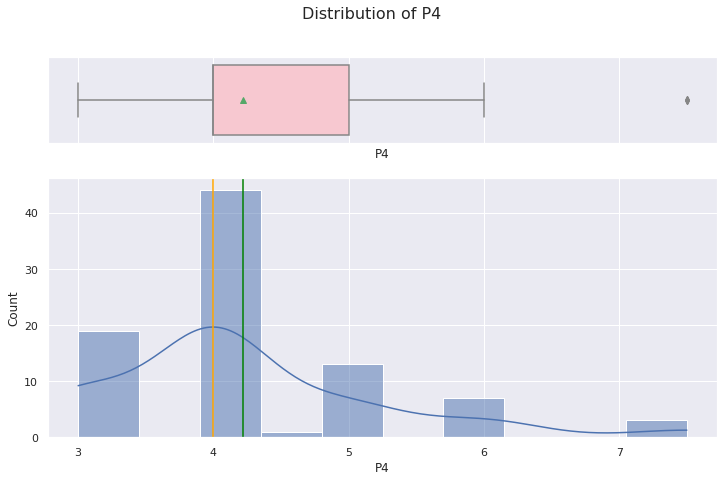

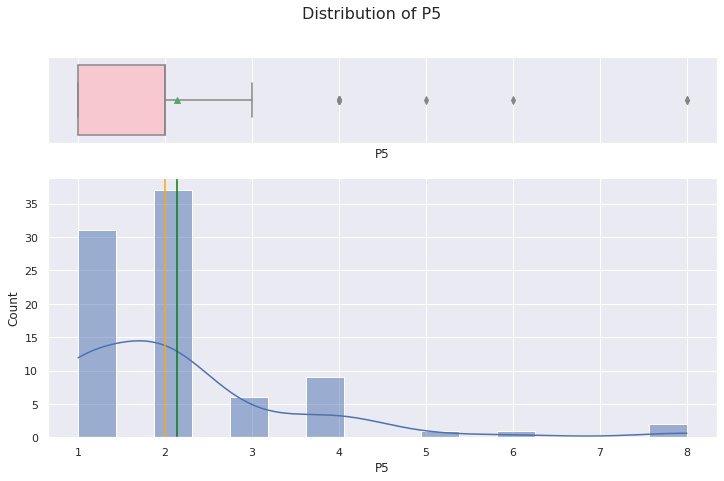

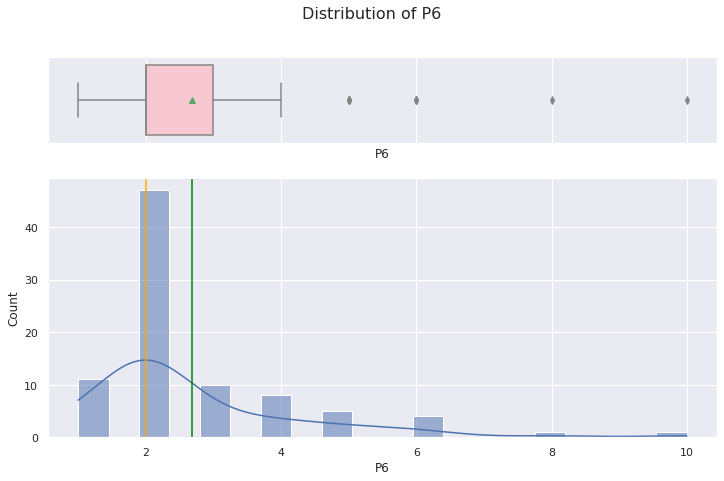

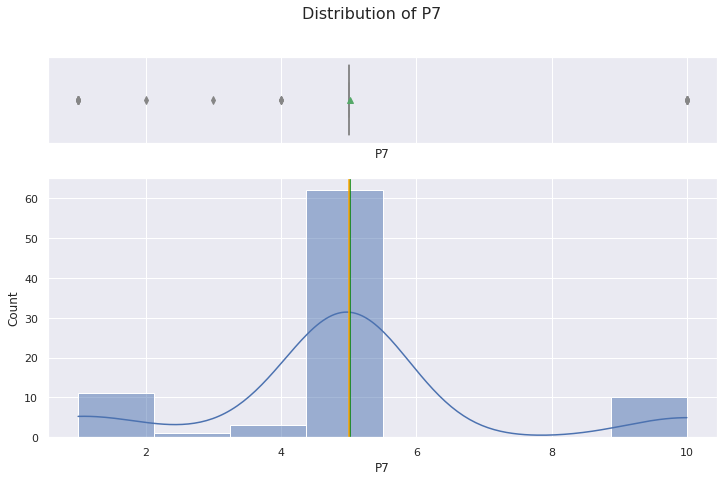

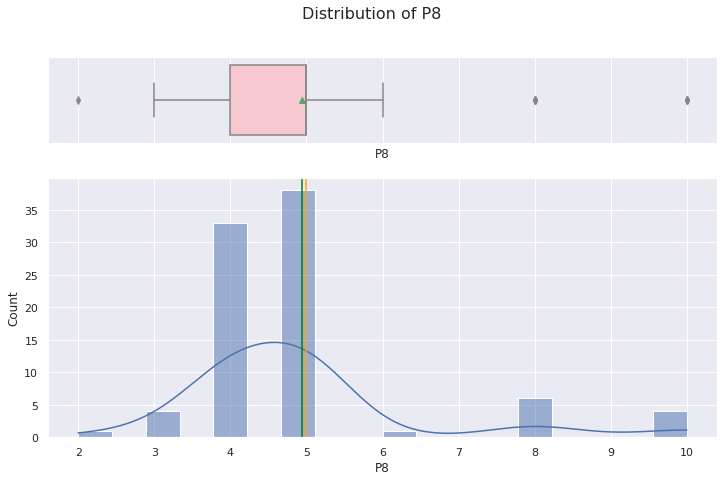

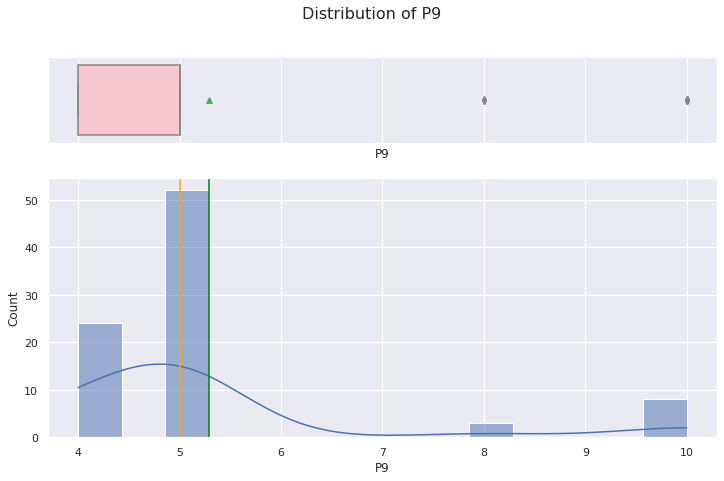

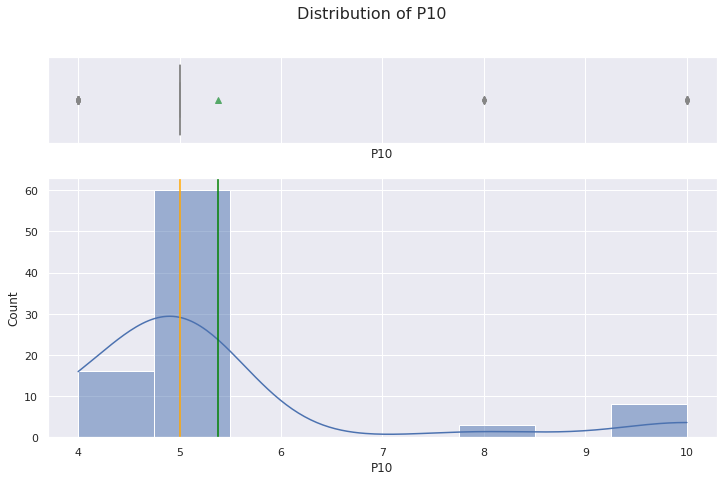

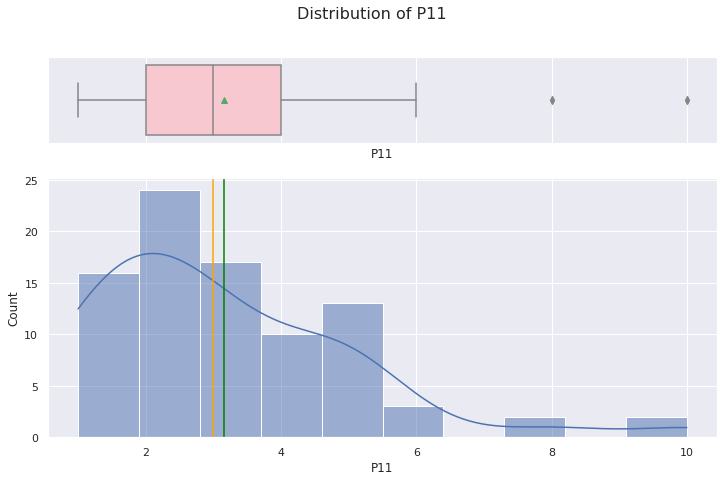

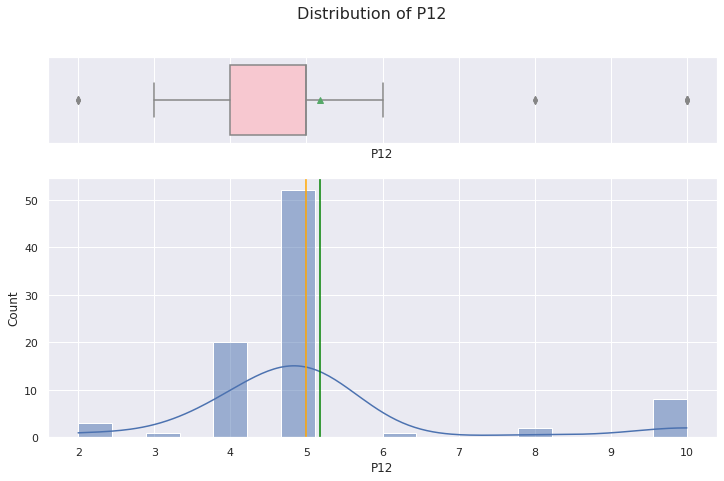

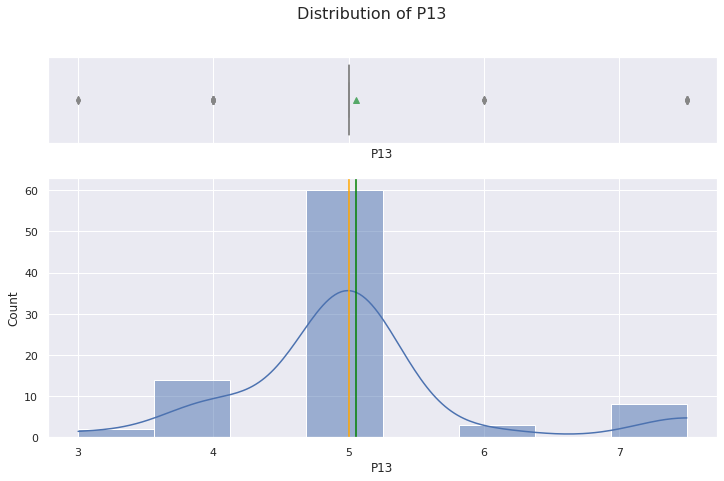

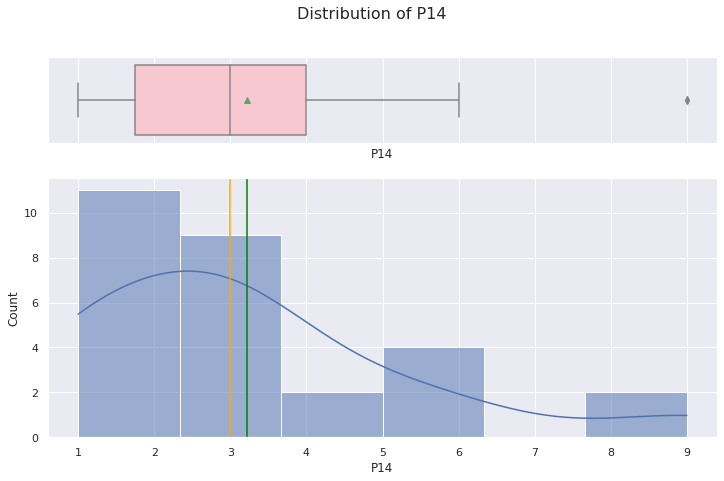

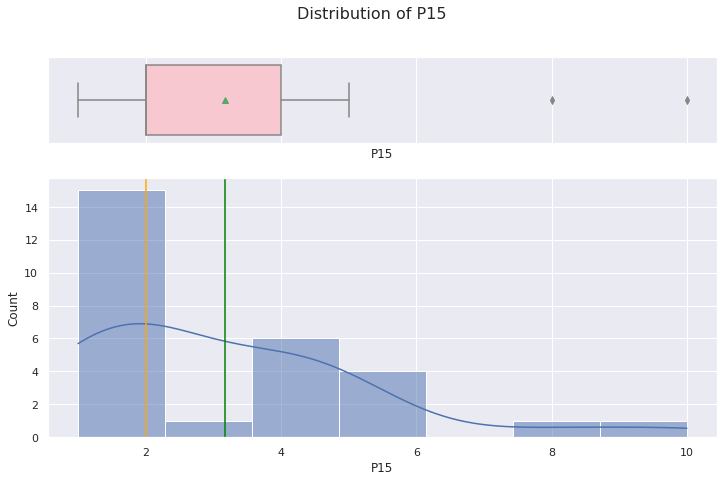

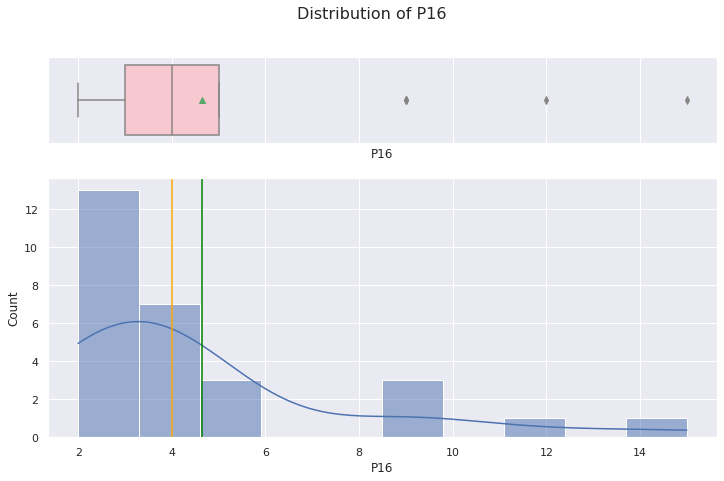

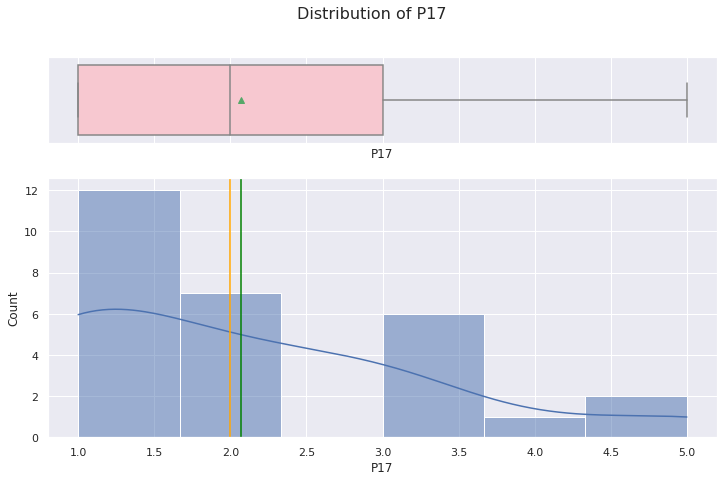

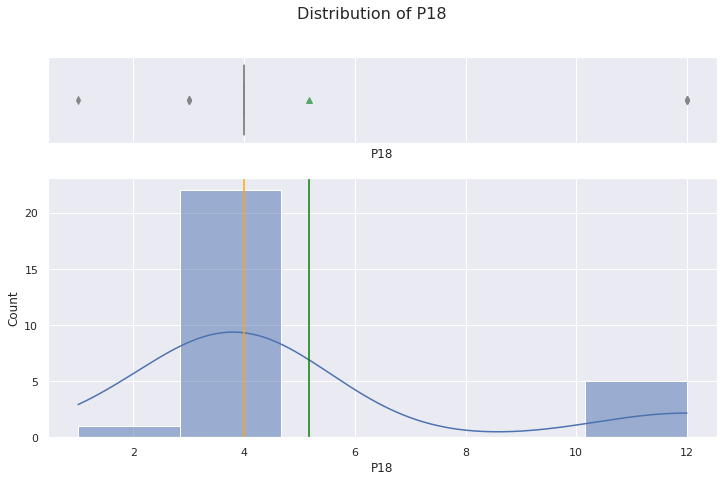

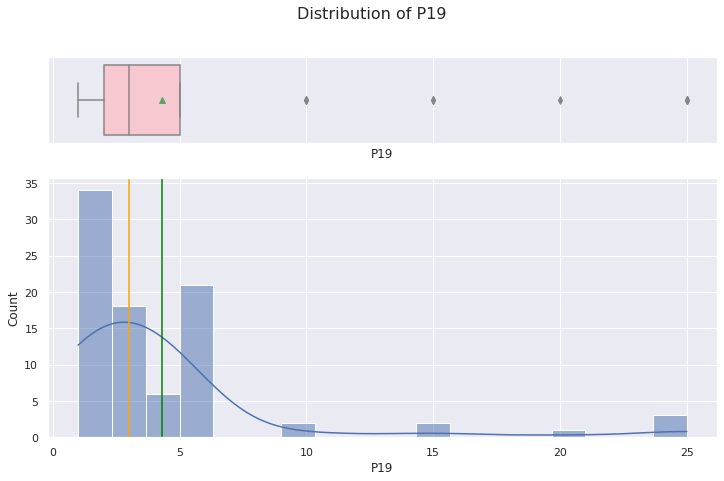

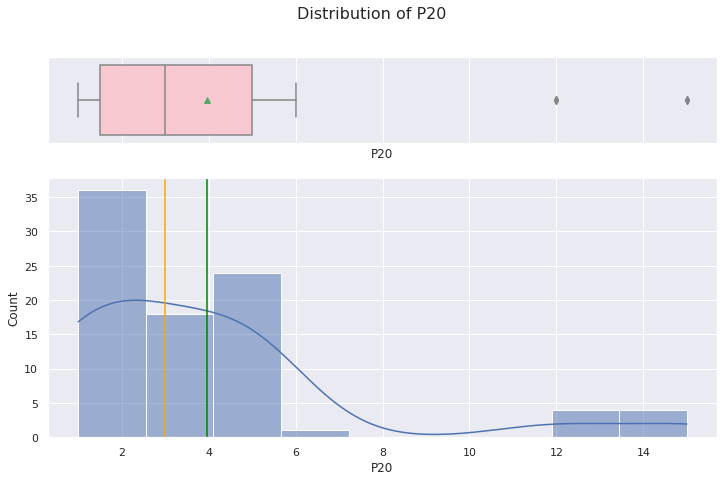

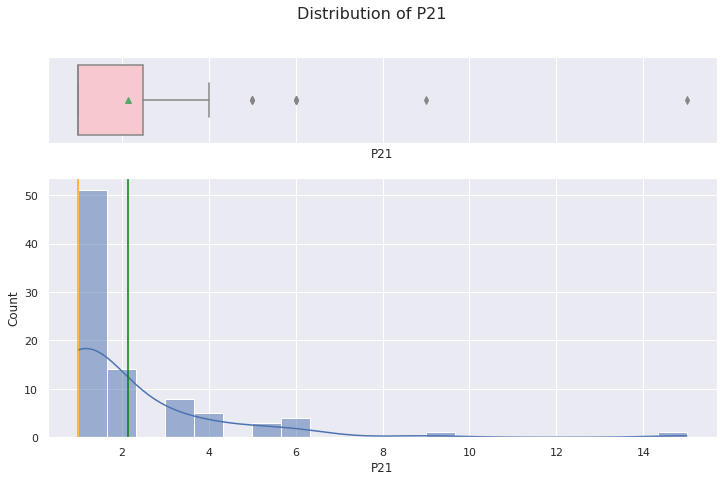

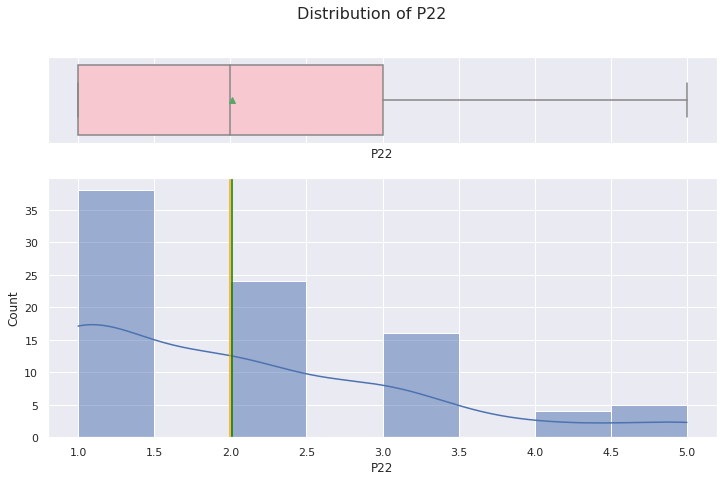

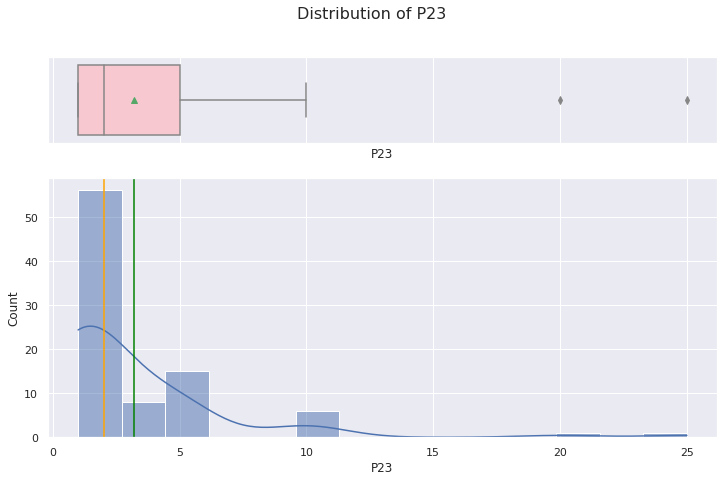

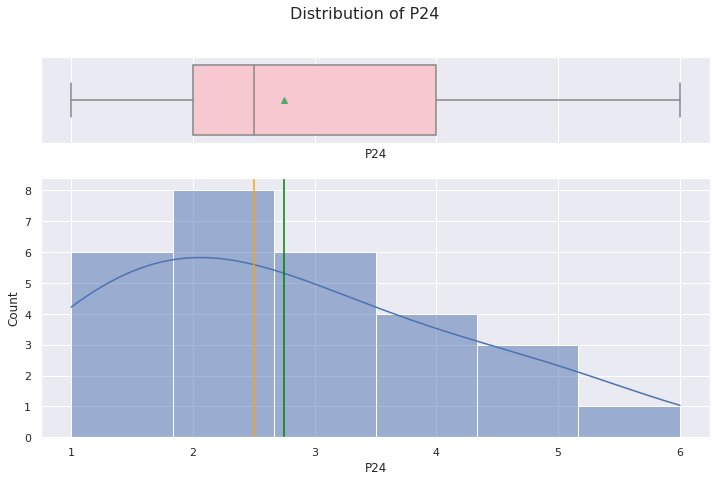

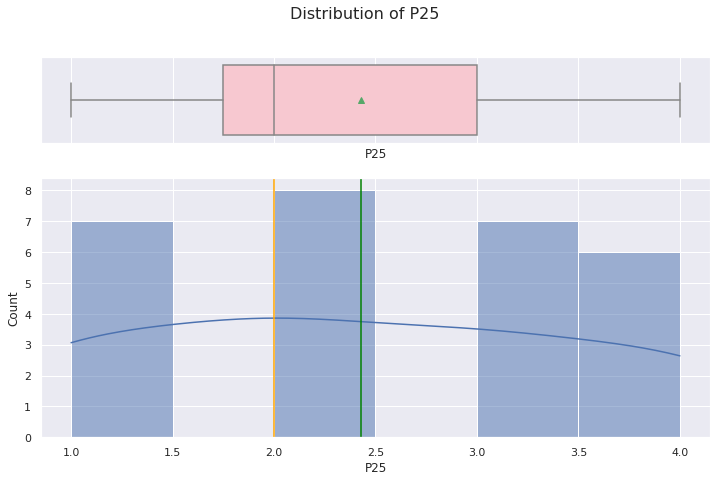

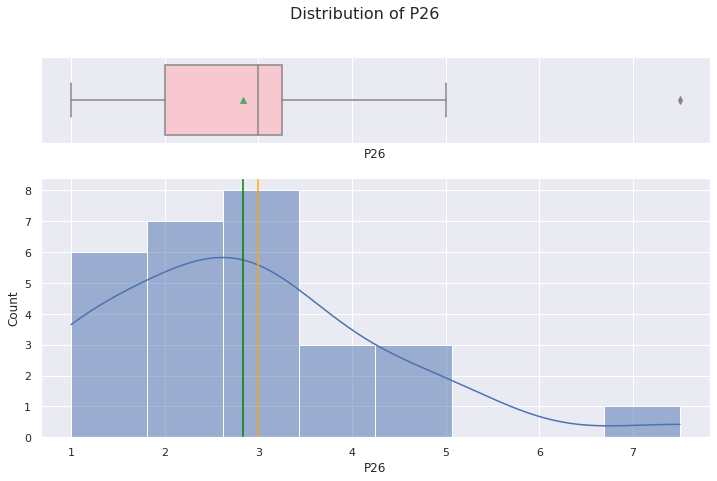

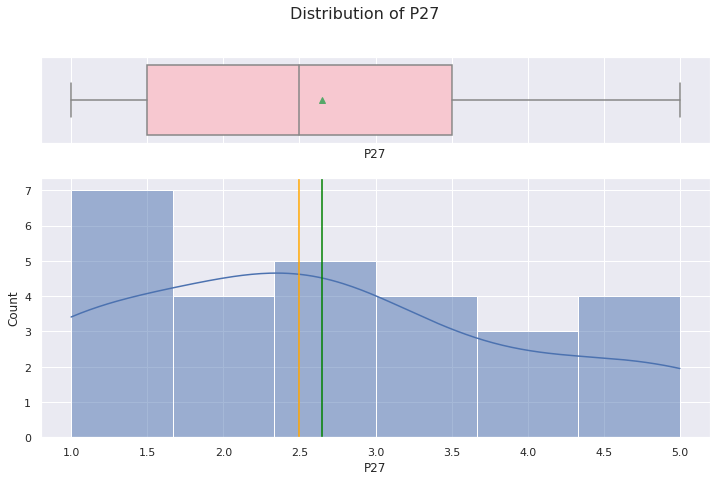

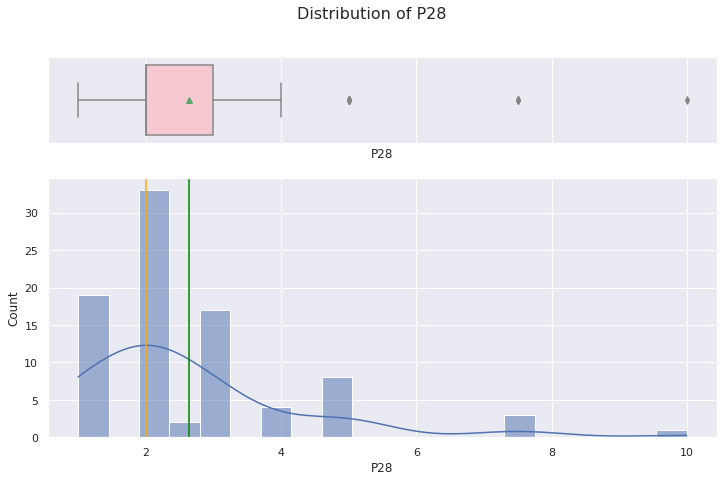

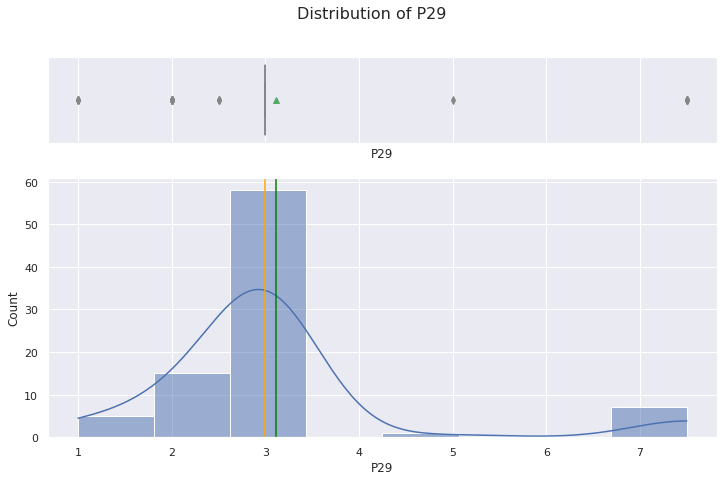

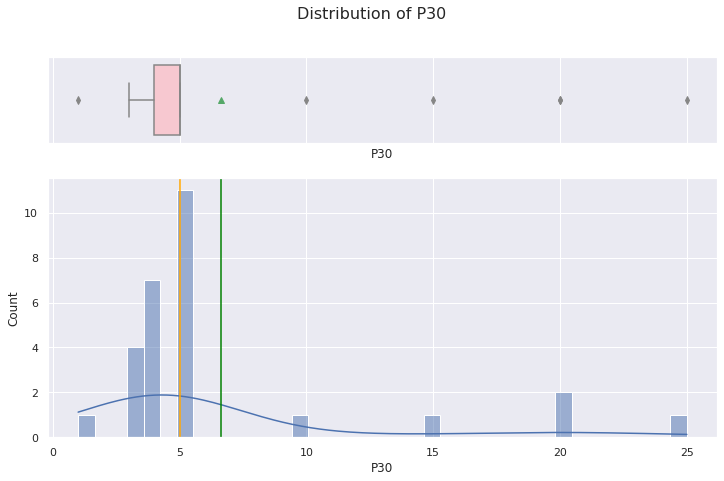

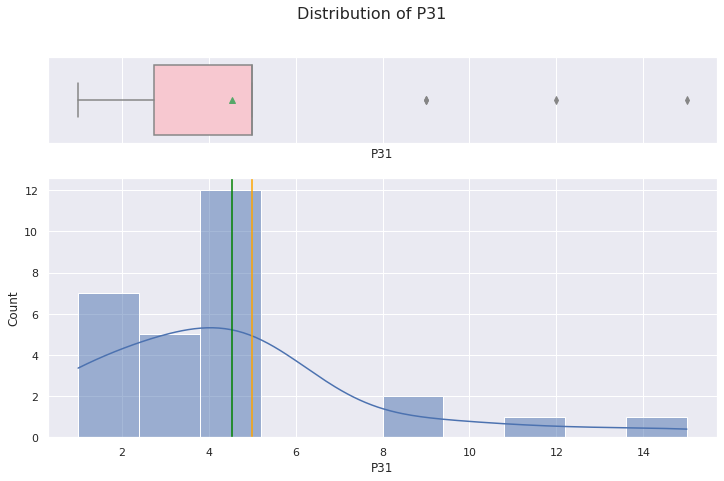

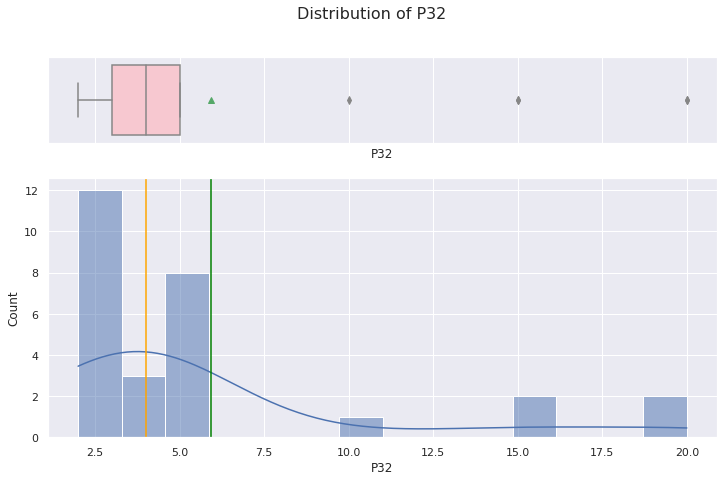

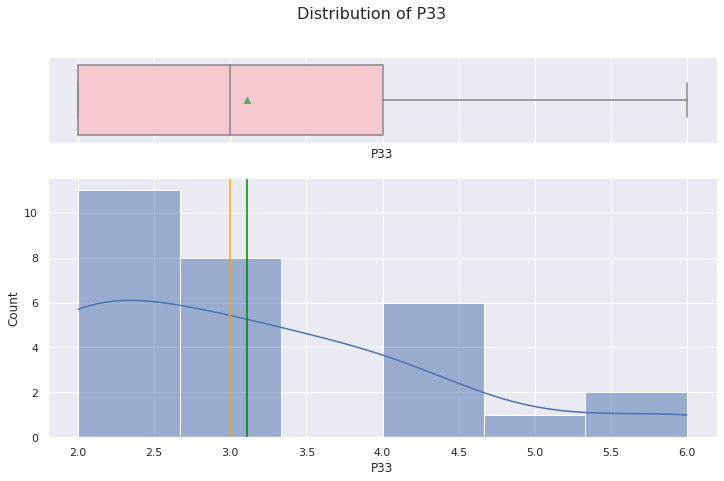

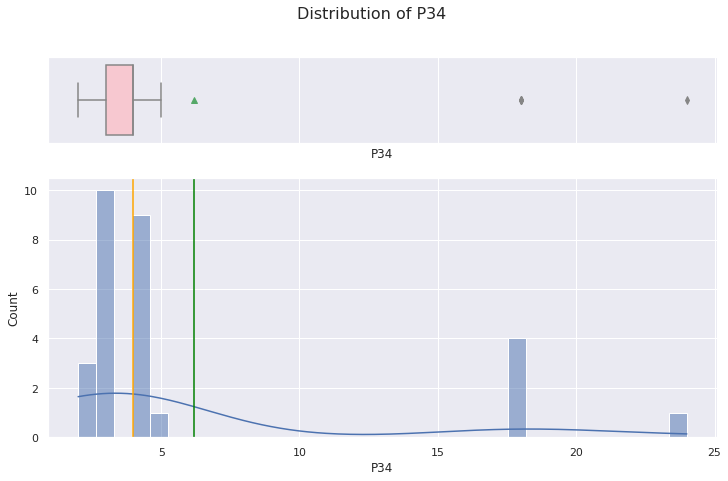

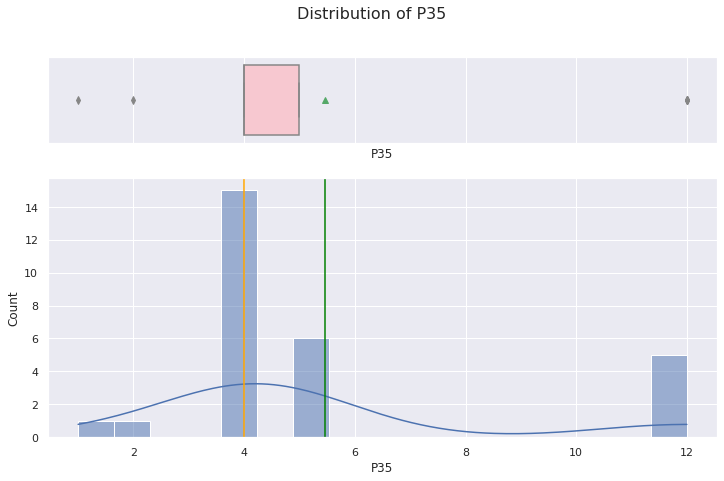

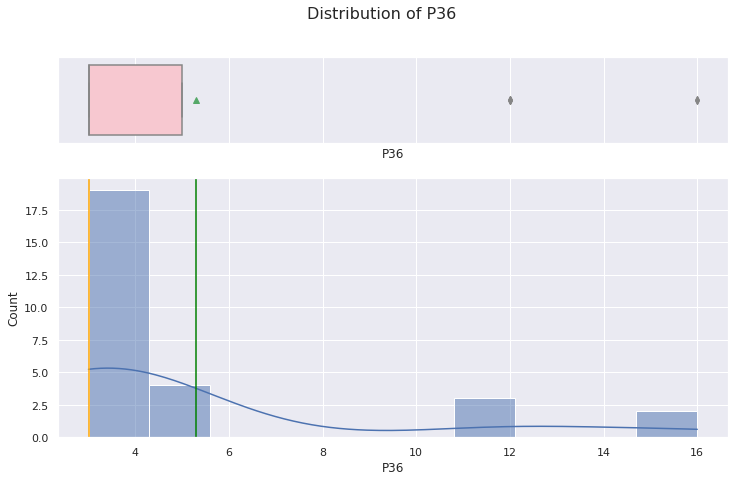

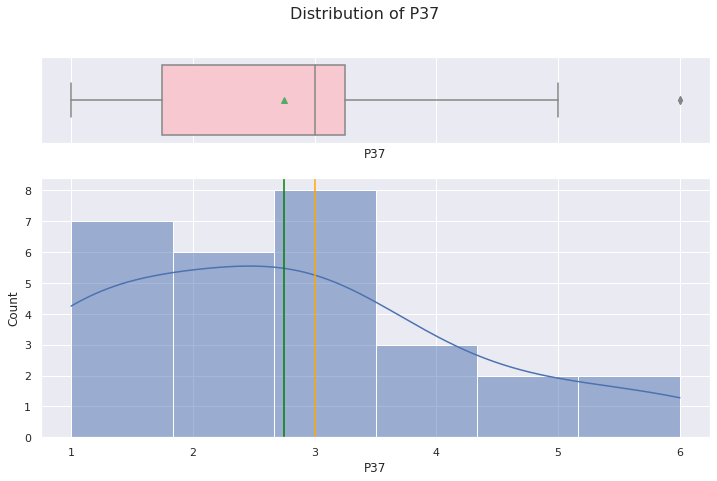

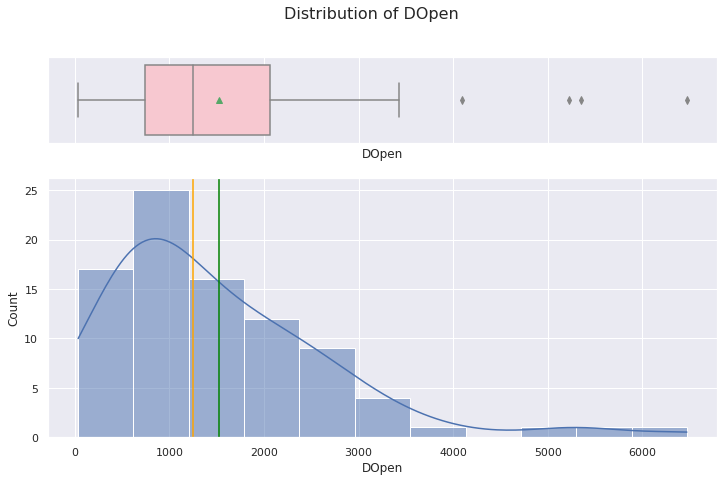

In [39]:
for i in cols_num:
  hist_box(df_train[df_train["City"] != 'İstanbul'],i,drop=0)
  #hist_box(df_train,i)

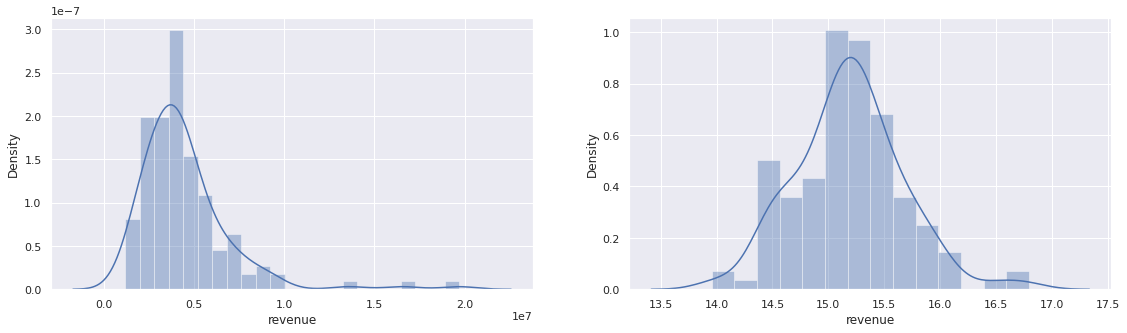

In [55]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
sns.distplot(df_train['revenue'], kde=True,  ax=ax[0]);
sns.distplot(np.log(df_train['revenue']), kde=True,  ax=ax[1]);
fig.show()

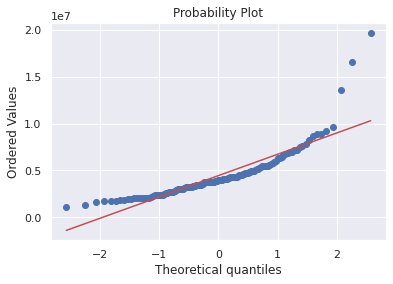

In [72]:
from scipy import stats
stats.probplot(df_train['revenue'], plot=plt);

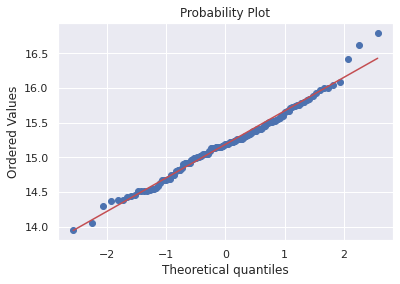

In [73]:
stats.probplot(np.log(df_train['revenue']), plot=plt);